In [264]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import re
#PATH PROCESS
import os

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV, cross_val_score

import lightgbm as lgb


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import StratifiedKFold
from collections import Counter
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.metrics import mean_squared_error, r2_score

#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)
import warnings
from sklearn.metrics import log_loss

#SKLEARN CLASSIFIER
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score

import optuna

In [265]:
os.getcwd()

'C:\\Users\\pedne\\Python\\Competition\\Deloitte'

In [266]:
os.chdir('C:\\Users\\pedne\\Python\\Competition\\Deloitte')

In [267]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [268]:
train_data = pd.read_csv('C:\\Users\\pedne\\Python\\Competition\\Deloitte\\train.csv')
test_data  = pd.read_csv('C:\\Users\\pedne\\Python\\Competition\\Deloitte\\test.csv')

#Shape of train and test
print('There are {} rows and {} columns in train'.format(train_data.shape[0],train_data.shape[1]))
print('There are {} rows and {} columns in test'.format(test_data.shape[0],test_data.shape[1]))

There are 67463 rows and 35 columns in train
There are 28913 rows and 35 columns in test


In [269]:
#Prepare submission File
submission = pd.DataFrame()

In [270]:
train_data.head(5)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [271]:
test_data.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,76468.82190,Source Verified,n,Home improvement,16.749219,1,0,12,1,3576,67.278287,5,f,4469.449851,0.088031,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,NaN
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,38079.01344,Source Verified,n,Credit card refinancing,18.157975,0,0,11,0,1932,71.313157,21,w,993.907530,0.041237,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,NaN
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,51275.93268,Source Verified,n,Debt consolidation,15.190011,0,0,22,0,598,50.883065,23,f,729.113379,0.021745,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,NaN
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,68867.98965,Verified,n,Debt Consolidation,21.292550,0,0,11,0,5222,82.449083,28,w,715.867091,0.092398,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,NaN
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,91556.85423,Verified,n,Debt consolidation,4.812117,0,0,11,0,553,49.075855,9,w,248.572854,0.010354,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145,NaN


In [272]:
train_data.rename(columns={'Employment Duration': 'Ownership_Type', 'Home Ownership': 'Duration'}, inplace=True)
test_data.rename(columns={'Employment Duration': 'Ownership_Type', 'Home Ownership': 'Duration'}, inplace=True)

In [273]:
#Outlier Removal
train_data=train_data[train_data['Collection Recovery Fee']<55]
train_data=train_data[train_data['Total Current Balance']<1000000]
train_data=train_data[train_data['Total Received Late Fee']<40]

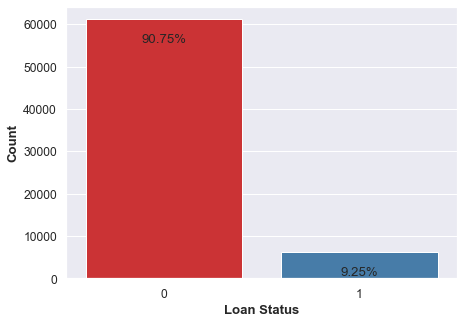

In [274]:
plt.figure(figsize=(7,5))
total = len(train_data['Loan Status'])
count_entries=sns.countplot(x='Loan Status',data=train_data)
plt.xlabel('Loan Status',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
for p in count_entries.patches:
    count_entries.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()), 
                               ha = 'center', va = 'center', xytext = (0, -20), textcoords = 'offset points')

In [275]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67358 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67358 non-null  int64  
 1   Loan Amount                   67358 non-null  int64  
 2   Funded Amount                 67358 non-null  int64  
 3   Funded Amount Investor        67358 non-null  float64
 4   Term                          67358 non-null  int64  
 5   Batch Enrolled                67358 non-null  object 
 6   Interest Rate                 67358 non-null  float64
 7   Grade                         67358 non-null  object 
 8   Sub Grade                     67358 non-null  object 
 9   Ownership_Type                67358 non-null  object 
 10  Duration                      67358 non-null  float64
 11  Verification Status           67358 non-null  object 
 12  Payment Plan                  67358 non-null  object 
 13  L

In [276]:
#train_data.describe(include='all')

In [277]:
#get all the columns with catagorical values
cat_columns = list(train_data.select_dtypes(['object']).columns)

[(col, train_data[col].unique()) for col in cat_columns]

[('Batch Enrolled',
  array(['BAT2522922', 'BAT1586599', 'BAT2136391', 'BAT2428731',
         'BAT5341619', 'BAT4694572', 'BAT4808022', 'BAT2558388',
         'BAT2078974', 'BAT2252229', 'BAT2333412', 'BAT5849876',
         'BAT2833642', 'BAT2803411', 'BAT5525466', 'BAT5714674',
         'BAT2003848', 'BAT4722912', 'BAT3873588', 'BAT1780517',
         'BAT4271519', 'BAT5811547', 'BAT1184694', 'BAT4136152',
         'BAT3193689', 'BAT1467036', 'BAT2575549', 'BAT4351734',
         'BAT1104812', 'BAT5924421', 'BAT1930365', 'BAT1766061',
         'BAT5489674', 'BAT3865626', 'BAT5629144', 'BAT5547201',
         'BAT224923', 'BAT3726927', 'BAT3461431', 'BAT1761981',
         'BAT1135695'], dtype=object)),
 ('Grade', array(['B', 'C', 'F', 'A', 'G', 'E', 'D'], dtype=object)),
 ('Sub Grade',
  array(['C4', 'D3', 'D4', 'C3', 'G5', 'C5', 'A5', 'C2', 'B5', 'B1', 'B4',
         'A4', 'B2', 'D2', 'C1', 'F3', 'D1', 'F2', 'A2', 'A3', 'F1', 'E5',
         'B3', 'F4', 'G1', 'F5', 'E1', 'E2', 'D5', 'G2',

In [278]:
#get all the columns with catagorical values
cat_columns = list(test_data.select_dtypes(['object']).columns)

[(col, test_data[col].unique()) for col in cat_columns]

[('Batch Enrolled',
  array(['BAT2575549', 'BAT2833642', 'BAT1761981', 'BAT5341619',
         'BAT4694572', 'BAT1766061', 'BAT1104812', 'BAT2078974',
         'BAT5849876', 'BAT2136391', 'BAT2333412', 'BAT4351734',
         'BAT1780517', 'BAT1930365', 'BAT4722912', 'BAT2428731',
         'BAT2252229', 'BAT5489674', 'BAT4808022', 'BAT4271519',
         'BAT2803411', 'BAT4136152', 'BAT3873588', 'BAT1586599',
         'BAT224923', 'BAT5924421', 'BAT1184694', 'BAT3193689',
         'BAT3726927', 'BAT2522922', 'BAT3461431', 'BAT5525466',
         'BAT2558388', 'BAT1467036', 'BAT2003848', 'BAT5714674',
         'BAT5629144', 'BAT5547201', 'BAT1135695', 'BAT3865626',
         'BAT5811547'], dtype=object)),
 ('Grade', array(['A', 'B', 'C', 'E', 'D', 'F', 'G'], dtype=object)),
 ('Sub Grade',
  array(['D1', 'E3', 'C3', 'A2', 'B3', 'B2', 'C2', 'B4', 'D3', 'B5', 'C1',
         'A3', 'A5', 'F5', 'F4', 'E4', 'A4', 'E5', 'C5', 'A1', 'D2', 'E2',
         'F1', 'D5', 'C4', 'F3', 'B1', 'D4', 'E1', 'G4',

In [279]:

len(train_data["Total Accounts"].value_counts())

69

In [280]:
len(test_data["Open Account"].value_counts())

36

In [281]:
train_data["Total Accounts"].replace(r"^ +| +$", r"", regex=True, inplace=True)
test_data["Total Accounts"].replace(r"^ +| +$", r"", regex=True, inplace=True)

In [282]:
test_data.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Ownership_Type,Duration,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,76468.82190,Source Verified,n,Home improvement,16.749219,1,0,12,1,3576,67.278287,5,f,4469.449851,0.088031,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,NaN
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,38079.01344,Source Verified,n,Credit card refinancing,18.157975,0,0,11,0,1932,71.313157,21,w,993.907530,0.041237,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,NaN
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,51275.93268,Source Verified,n,Debt consolidation,15.190011,0,0,22,0,598,50.883065,23,f,729.113379,0.021745,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,NaN
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,68867.98965,Verified,n,Debt Consolidation,21.292550,0,0,11,0,5222,82.449083,28,w,715.867091,0.092398,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,NaN
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,91556.85423,Verified,n,Debt consolidation,4.812117,0,0,11,0,553,49.075855,9,w,248.572854,0.010354,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145,NaN


In [283]:
# Data Pre-processing
train_data["Term"]  = train_data["Term"].astype('object')
train_data["Delinquency - two years"]  = train_data["Delinquency - two years"].astype('object')
train_data["Inquires - six months"]  = train_data["Inquires - six months"].astype('object')
train_data["Public Record"]  = train_data["Public Record"].astype('object')
train_data["Open Account"]  = train_data["Open Account"].astype('object')
train_data["Total Accounts"]  = train_data["Total Accounts"].astype('object')
train_data["Last week Pay"]  = train_data["Last week Pay"].astype('object')
train_data["Loan Status"]  = train_data["Loan Status"].astype('int')

test_data["Term"]  = test_data["Term"].astype('object')
test_data["Delinquency - two years"]  = test_data["Delinquency - two years"].astype('object')
test_data["Inquires - six months"]  = test_data["Inquires - six months"].astype('object')
test_data["Public Record"]  = test_data["Public Record"].astype('object')
test_data["Open Account"]  = test_data["Open Account"].astype('object')
test_data["Total Accounts"]  = test_data["Total Accounts"].astype('object')
test_data["Last week Pay"]  = test_data["Last week Pay"].astype('object')

#Replacing rows in test which are not present in train
test_data["Term"].replace(to_replace =60,value =59, inplace=True) 
test_data["Delinquency - two years"].replace(to_replace =9,value =8, inplace=True) 
test_data["Total Accounts"].replace(to_replace =73,value =72, inplace=True)

In [284]:
train_data['train_or_test']='train'
test_data['train_or_test']='test'

df=pd.concat([train_data,test_data])

print("Combined dataset shape: {0}: ".format(df.shape))

Combined dataset shape: (96271, 36): 


In [285]:
#Remove leading and trailing spaces from column names 
df["Loan Title"].replace(r"^ +| +$", r"", regex=True, inplace=True)
#df["New_Grade"] = df["Grade"] + df["Sub Grade"]
#df["Verification Status"].replace(to_replace ="Source Verified",value ="Verified", inplace=True)

In [286]:
df["Loan Title"].value_counts()

Credit card refinancing       42030
Debt consolidation            37068
Debt Consolidation             4681
Other                          3559
Home improvement               3291
Major purchase                  745
Medical expenses                379
Business                        299
Moving and relocation           253
Car financing                   230
Vacation                        190
debt consolidation              174
Consolidation                   170
Home buying                     151
Personal Loan                   115
Debt Consolidation Loan         110
Credit Card Consolidation       106
Home Improvement                 94
Consolidate                      86
consolidation                    78
Consolidation Loan               77
Credit Card Debt                 68
payoff                           67
Freedom                          64
DEBT CONSOLIDATION               63
Green loan                       63
Credit Card Refinance            62
consolidate                 

In [287]:
#Rename loan duplicate categories 

df['Loan_Type']  = "NONE"

desc = {

        #Personal_Loan
        "Personal loan":"Personal_Loan",
        "Personal":"Personal_Loan",
        "personal":"Personal_Loan",
        
        #Vacation_Loan
        "vacation":"Vacation_Loan",
        "Vacation":"Vacation_Loan",
        
        #Home_Loan
        "Home buying":"Home_Loan",
        "Home loan":"Home_Loan",
        "House":"Home_Loan",
        "Home improvement":"Home_Loan",
        "Home Improvement":"Home_Loan",
        "home improvement":"Home_Loan",
        "Home Improvement Loan":"Home_Loan",
        "Home":"Home_Loan",
        "Bathroom":"Home_Loan",
    
        #Medical_Loan
        "Medical expenses":"Medical_Loan",
        "Medical":"Medical_Loan",
        "Medical loan":"Medical_Loan",
      
        #Debt_Consolidation_Loan
        "Debt Consolidation":"Debt_Consolidation_Loan",
        "Debt consolidation":"Debt_Consolidation_Loan",
        "DEBT CONSOLIDATION":"Debt_Consolidation_Loan",
        "Debt Consolidation Loan":"Debt_Consolidation_Loan",
        "Dept consolidation":"Debt_Consolidation_Loan",
        "Debt Consolidation 2013":"Debt_Consolidation_Loan",
        "debt consolidation loan":"Debt_Consolidation_Loan",
        "Loan Consolidation":"Debt_Consolidation_Loan",
        "Bill Consolidation":"Debt_Consolidation_Loan",
    
        #Consolidation_Loan
        "consolidate":"Consolidation_Loan",
        "Consolidation":"Consolidation_Loan",
        "Consolidate":"Consolidation_Loan",
        "Consolidated":"Consolidation_Loan",
        "consolidation loan":"Consolidation_Loan",
        "CONSOLIDATE":"Consolidation_Loan",
        "conso":"Consolidation_Loan",
        "CONSOLIDATION":"Consolidation_Loan",
    
        #Credit_Card_Consolidation
        "Credit Card Consolidation":"Credit_Consolidation_Loan",
        "Credit Card consolidation":"Credit_Consolidation_Loan",
        "CC consolidation":"Credit_Consolidation_Loan",
        "Credit Consolidation":"Credit_Consolidation_Loan",
        "Card Consolidation":"Credit_Consolidation_Loan",
        
        #Debt_Free
        "Get Debt Free":"Debt_Free",
        "get out of debt":"Debt_Free",
        "Debt payoff":"Debt_Free",
        "Debt Free":"Debt_Free",
        "relief":"Debt_Free",
        "Pay Off":"Debt_Free",
        "Getting Ahead":"Debt_Free",
        "Payoff":"Debt_Free",
        "payoff":"Debt_Free",
        "Bill Payoff":"Debt_Free",
        "pay off bills":"Debt_Free",
        "bills":"Debt_Free",
        "Freedom":"Debt_Free",
        "Debt Reduction":"Debt_Free",
       
        #CREDIT_CARDS
        "Credit Card":"CREDIT_CARDS",
        "CC":"CREDIT_CARDS",
        "Credit Cards":"CREDIT_CARDS",
        "cards":"CREDIT_CARDS",
        "Cards":"CREDIT_CARDS",
        "Credit Card Loan":"CREDIT_CARDS",
        "Credit Loan":"CREDIT_CARDS",
        "Credit":"CREDIT_CARDS",
        "Credit Card Debt":"CREDIT_CARDS",
        "Credit Card Paydown":"CREDIT_CARDS",
        "Credit Card Paydown":"CREDIT_CARDS",
        "Credit card pay off":"CREDIT_CARDS",
        "Credit card payoff":"CREDIT_CARDS",
        "credit pay off":"CREDIT_CARDS",
        "Credit payoff":"CREDIT_CARDS",
    
        #REFI_LOAN
        "Credit card refinancing":"REFI_LOAN",
        "Credit Card Refi":"REFI_LOAN",
        "CC Refi":"REFI_LOAN",
        "CC Refinance":"REFI_LOAN",
        "Credit Card Refinance":"REFI_LOAN",
        "CC-Refinance":"REFI_LOAN",
        "Credit Card Refinance Loan":"REFI_LOAN",
        "Refinance Loan":"REFI_LOAN",
        "refi":"REFI_LOAN",
        "Refinance":"REFI_LOAN",
     
        #Other_Loans
        "debt loan":"Other_Loans",
        "Debt Loan":"Other_Loans",
        "Loan 1":"Other_Loans",
        "loan1":"Other_Loans",
        "debt":"Other_Loans",
        "Debt":"Other_Loans",
        "MYLOAN":"Other_Loans",
        "My Loan":"Other_Loans",
        "Loan":"Other_Loans",
        "Green loan":"Other_Loans",
        "Wedding Loan":"Other_Loans",
        "Lending loan":"Other_Loans",
        "CC Loan":"Other_Loans",
        "Lending Club":"Other_Loans",
        "Pool":"Other_Loans",
 
        #CAR_LOAN
        "Car financing":"CAR_LOAN",
        "Car Loan":"CAR_LOAN",


        }

def check_desc(x):
    for key in desc:
        if key.lower() == x.lower():
            return desc[key]
    return x

df["Loan_Type"]  = df["Loan Title"].map(lambda x: check_desc(x))
#df["Loan Title"].value_counts()

In [288]:
df["Loan_Type"].value_counts()

REFI_LOAN                    42340
Debt_Consolidation_Loan      42185
Home_Loan                     3648
Other                         3559
Major purchase                 745
Consolidation_Loan             582
CREDIT_CARDS                   477
Other_Loans                    470
Medical_Loan                   409
Debt_Free                      387
Business                       299
Credit_Consolidation_Loan      253
Moving and relocation          253
CAR_LOAN                       243
Personal_Loan                  217
Vacation_Loan                  204
Name: Loan_Type, dtype: int64

In [289]:
df["Loan_Type"]  = df["Loan_Type"].astype('object')

In [290]:
print("Combined dataset shape: {0}: ".format(df.shape))

Combined dataset shape: (96271, 37): 


In [291]:
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Ownership_Type,Duration,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,train_or_test,Loan_Type
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0.0,train,Debt_Consolidation_Loan
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0.0,train,Debt_Consolidation_Loan
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0.0,train,Debt_Consolidation_Loan
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0.0,train,Debt_Consolidation_Loan
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0.0,train,REFI_LOAN


In [292]:
#set(train_data["Total Accounts"]).difference(set(test_data["Total Accounts"]))

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96271 entries, 0 to 28912
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            96271 non-null  int64  
 1   Loan Amount                   96271 non-null  int64  
 2   Funded Amount                 96271 non-null  int64  
 3   Funded Amount Investor        96271 non-null  float64
 4   Term                          96271 non-null  object 
 5   Batch Enrolled                96271 non-null  object 
 6   Interest Rate                 96271 non-null  float64
 7   Grade                         96271 non-null  object 
 8   Sub Grade                     96271 non-null  object 
 9   Ownership_Type                96271 non-null  object 
 10  Duration                      96271 non-null  float64
 11  Verification Status           96271 non-null  object 
 12  Payment Plan                  96271 non-null  object 
 13  L

In [294]:
#test_data["Accounts Delinquent"].value_counts()

In [295]:
train_cat=train_data.select_dtypes(include='object')
train_cat.drop(columns = 'Loan Title',axis=1,inplace=True)
train_cat.columns

C:\Users\pedne\anaconda3\envs\tg4\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Index(['Term', 'Batch Enrolled', 'Grade', 'Sub Grade', 'Ownership_Type',
       'Verification Status', 'Payment Plan', 'Delinquency - two years',
       'Inquires - six months', 'Open Account', 'Public Record',
       'Total Accounts', 'Initial List Status', 'Application Type',
       'Last week Pay', 'train_or_test'],
      dtype='object')

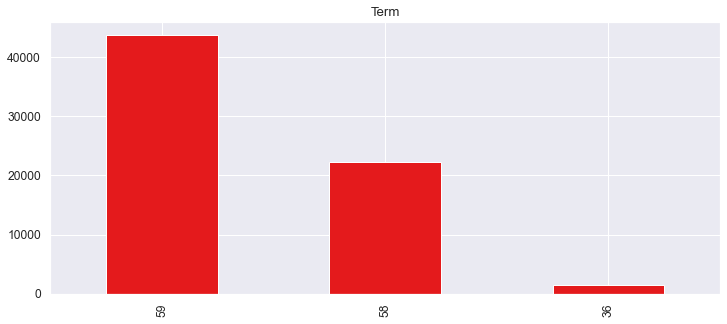

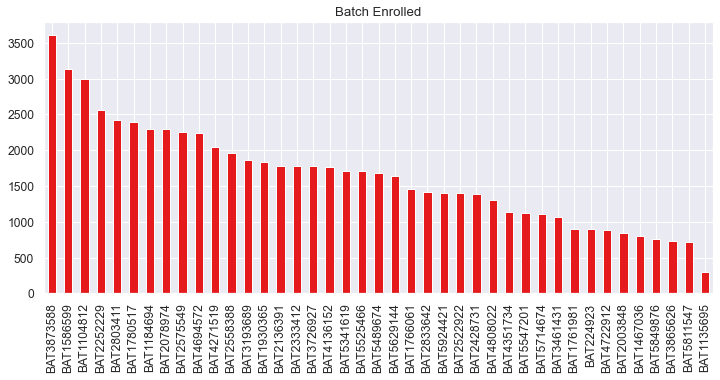

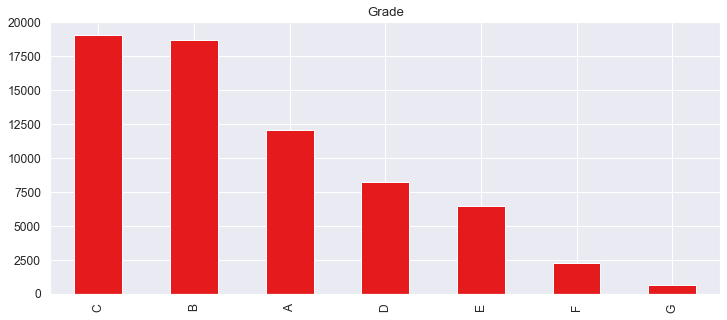

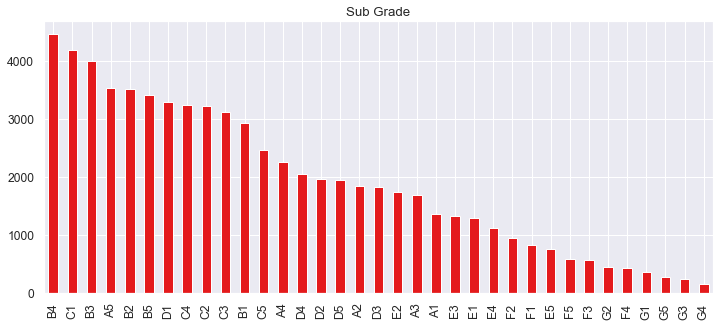

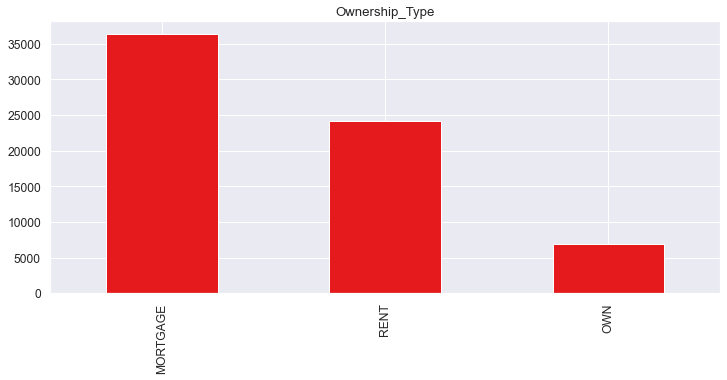

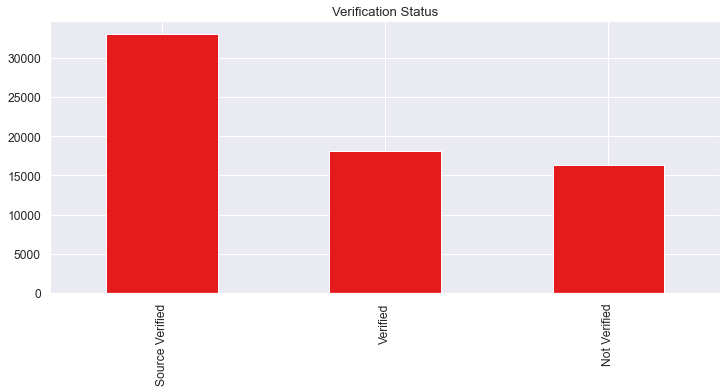

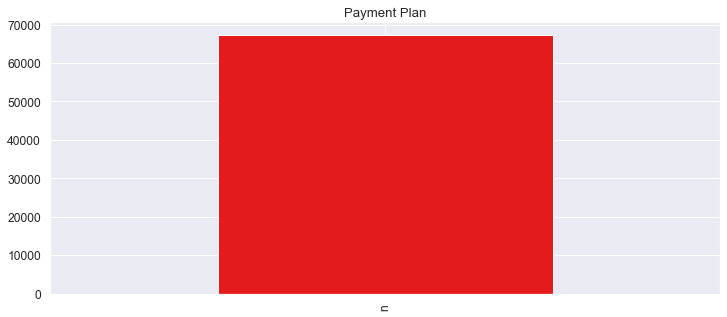

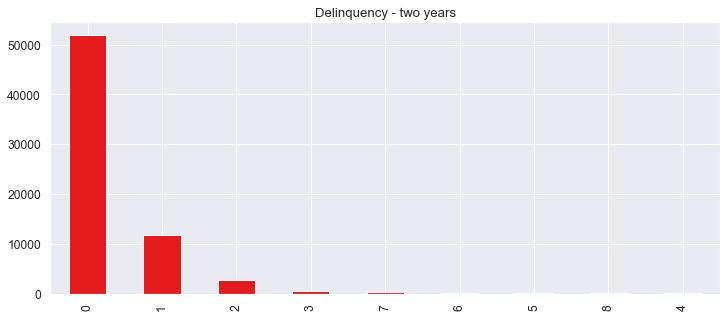

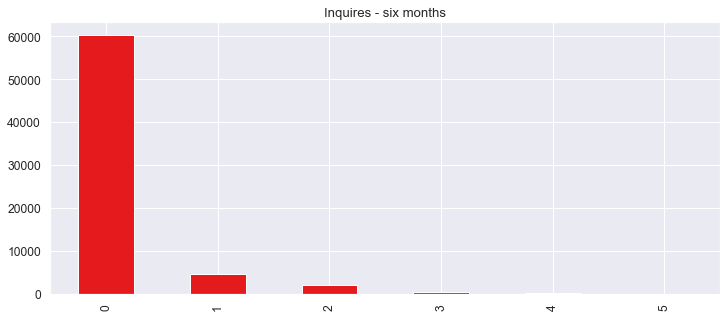

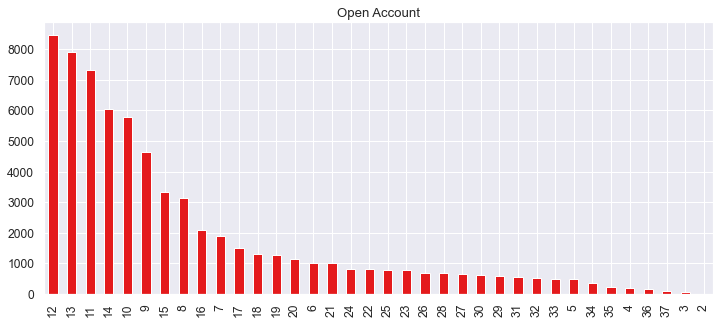

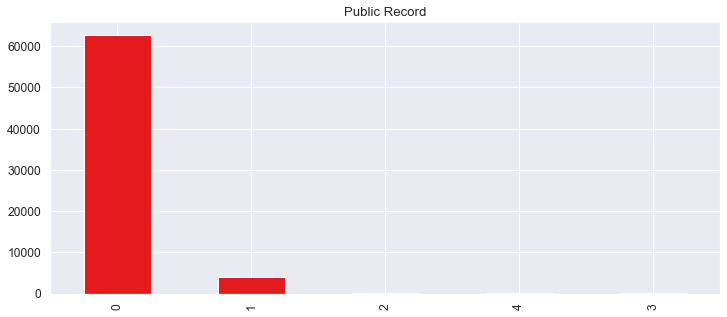

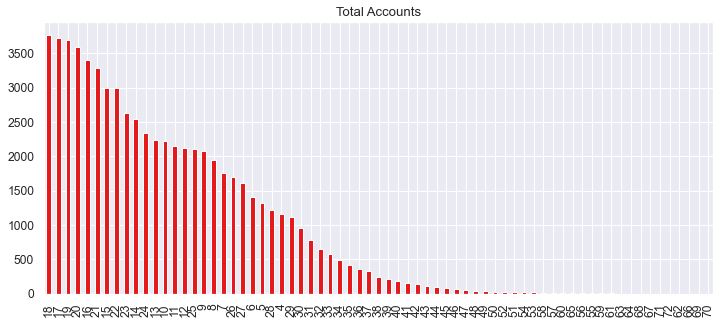

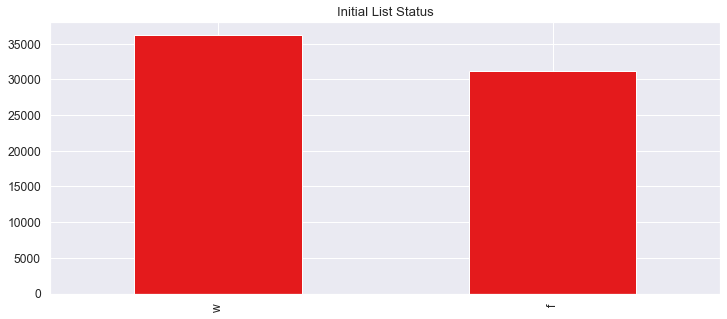

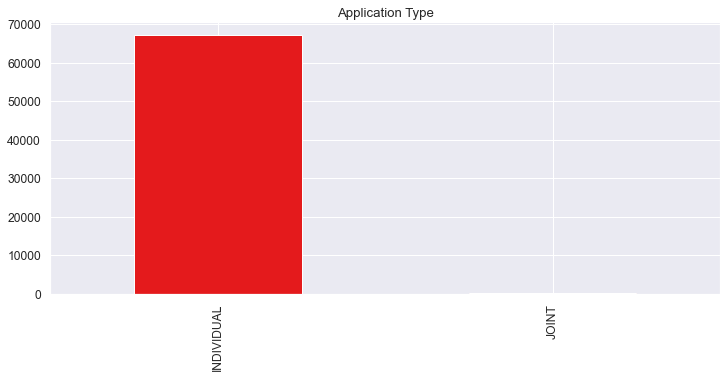

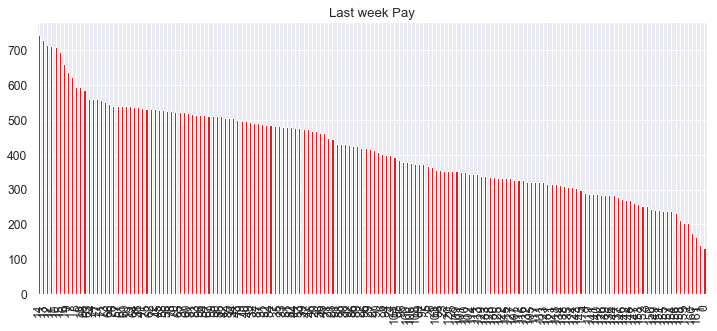

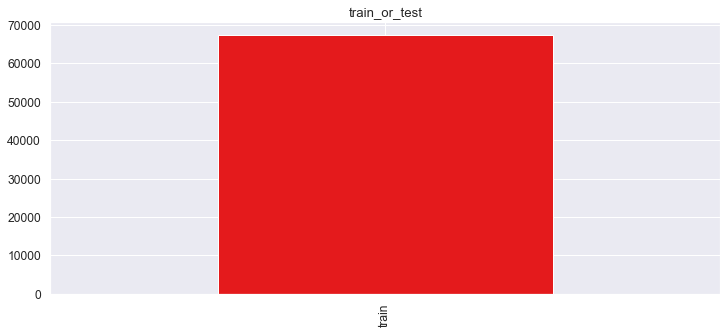

In [296]:
sns.set(style='darkgrid', palette="Set1", font_scale=1.1, rc={"figure.figsize": [12, 5]})
for i in train_cat.columns:
    train_data[i].value_counts().plot.bar()
    plt.title('{0}'.format(i))
    plt.show()

In [297]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67358 entries, 0 to 67462
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67358 non-null  int64  
 1   Loan Amount                   67358 non-null  int64  
 2   Funded Amount                 67358 non-null  int64  
 3   Funded Amount Investor        67358 non-null  float64
 4   Term                          67358 non-null  object 
 5   Batch Enrolled                67358 non-null  object 
 6   Interest Rate                 67358 non-null  float64
 7   Grade                         67358 non-null  object 
 8   Sub Grade                     67358 non-null  object 
 9   Ownership_Type                67358 non-null  object 
 10  Duration                      67358 non-null  float64
 11  Verification Status           67358 non-null  object 
 12  Payment Plan                  67358 non-null  object 
 13  L

In [298]:
train_numeric=train_data.select_dtypes(include=['int32','int64','float64'])
train_numeric.drop(columns = 'ID',axis=1,inplace=True)
train_numeric.columns

Index(['Loan Amount', 'Funded Amount', 'Funded Amount Investor',
       'Interest Rate', 'Duration', 'Debit to Income', 'Revolving Balance',
       'Revolving Utilities', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Accounts Delinquent',
       'Total Collection Amount', 'Total Current Balance',
       'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

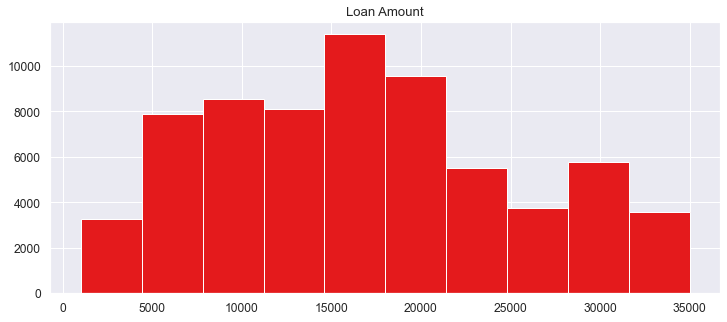

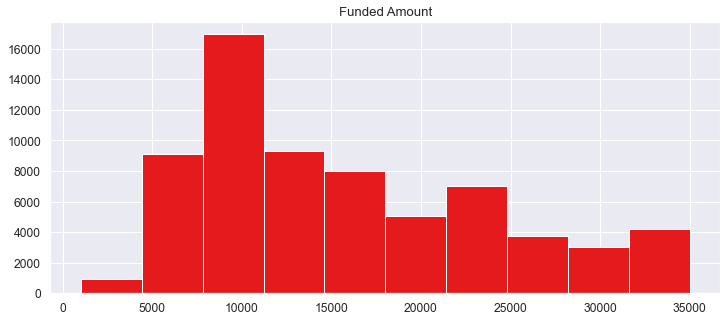

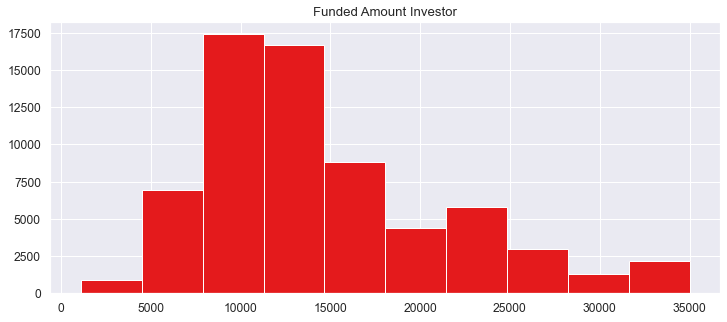

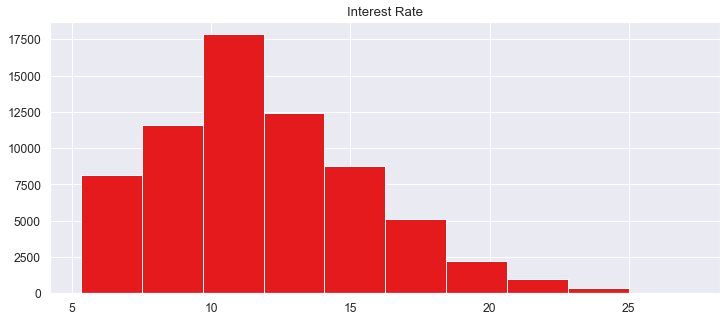

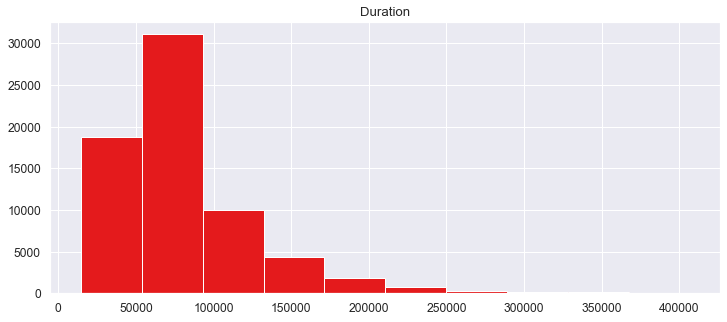

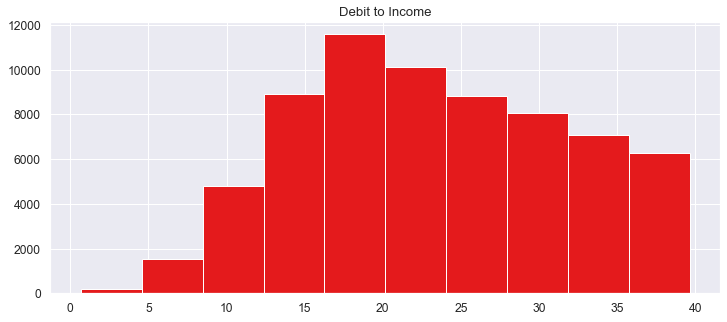

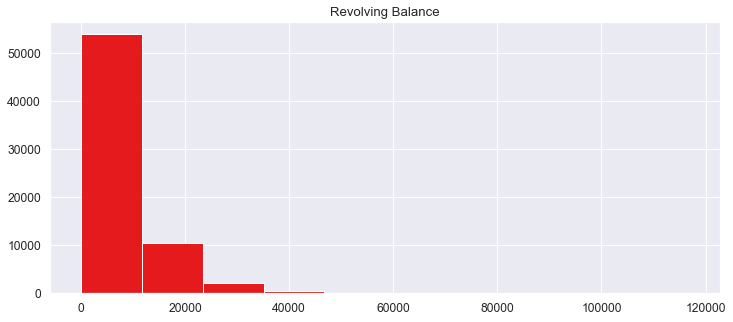

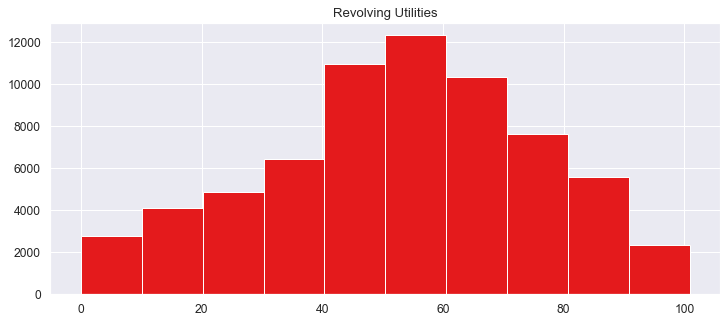

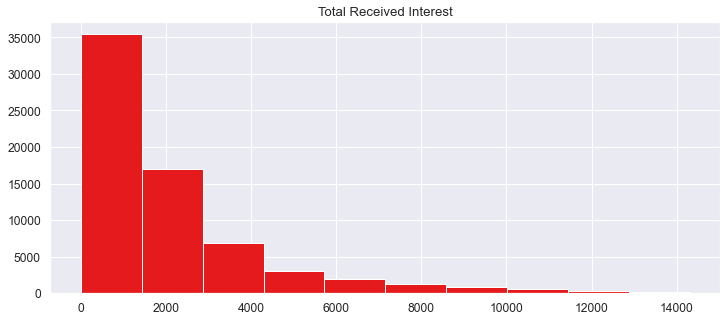

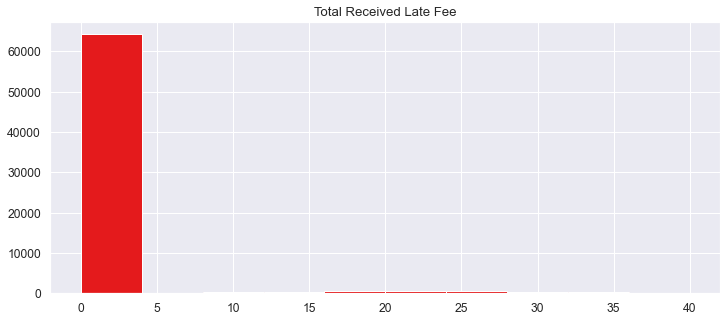

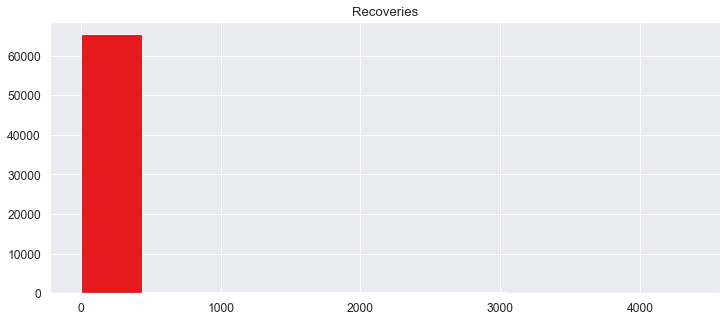

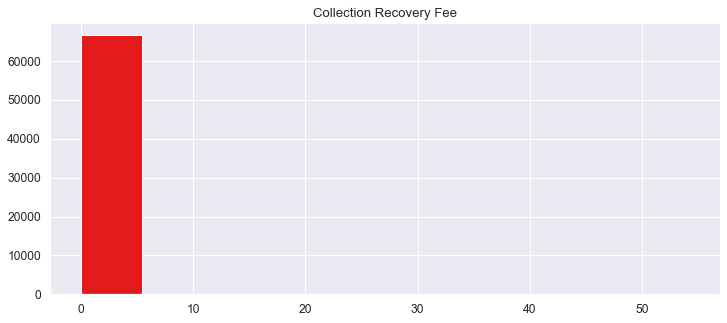

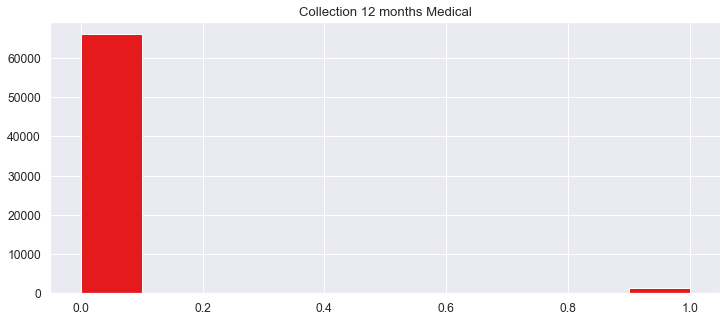

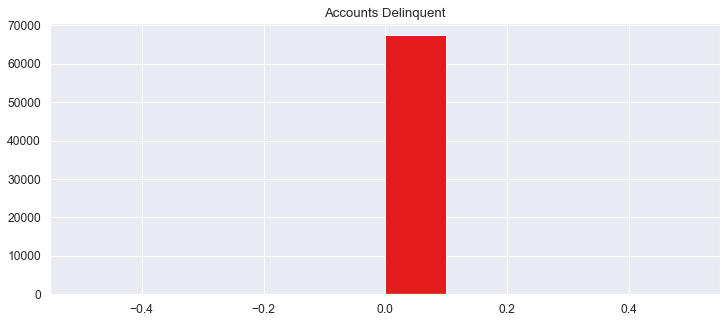

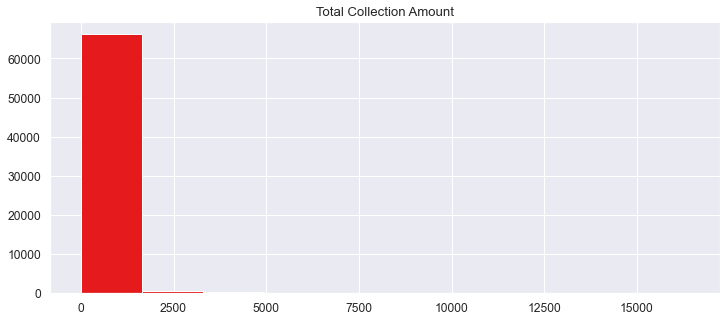

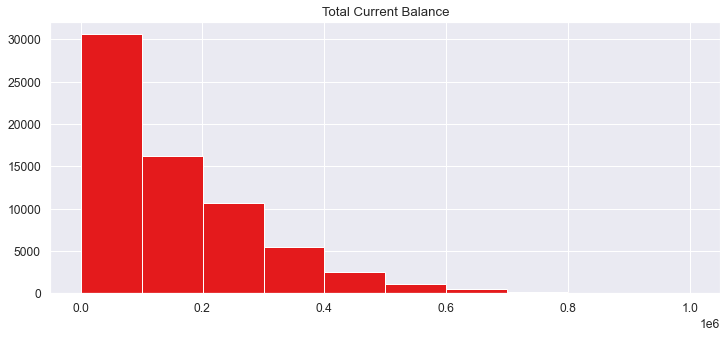

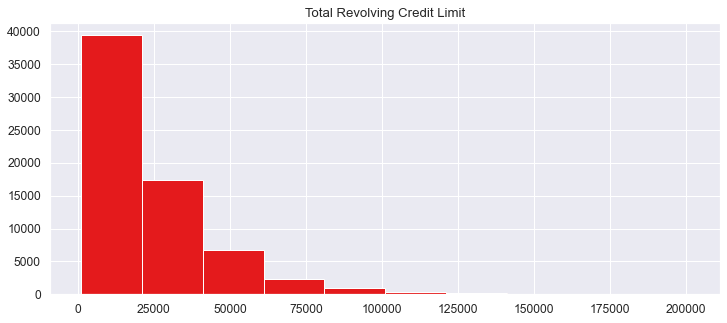

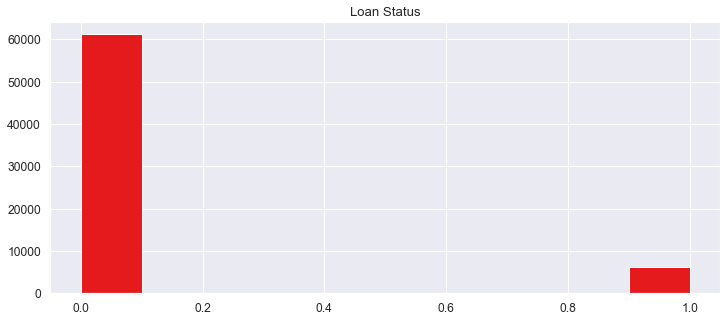

In [299]:
for i in train_numeric.columns:
    plt.hist(train_data[i])
    plt.title('{0}'.format(i))
    plt.show()

In [300]:
### EDA Starts ###

In [301]:
train_data.head(1)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Ownership_Type,Duration,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,train_or_test
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.6267,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0,train


count    67358.000000
mean     16849.767006
std       8368.124701
min       1014.000000
25%      10012.000000
50%      16073.000000
75%      22108.750000
max      35000.000000
Name: Loan Amount, dtype: float64

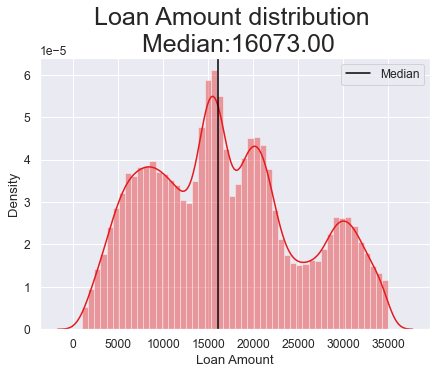

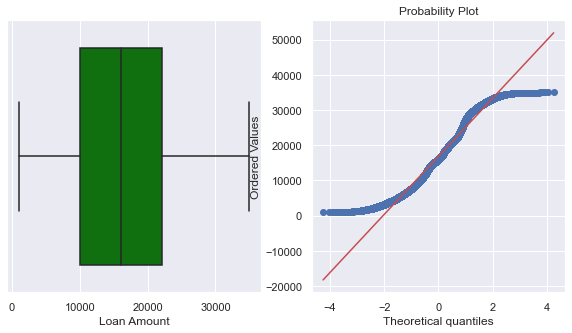

In [302]:
#Loan Amount

plt.figure(figsize=(7,5))
sns.distplot(train_data['Loan Amount'])
plt.title('Loan Amount distribution \n Median:{0:.2f}'.format(train_data['Loan Amount'].median()),size=25)
plt.axvline(train_data['Loan Amount'].median(),color='black',label='Median')
plt.legend()

from scipy import stats
from scipy.stats import norm, skew
sns.set()
fig3=plt.figure(figsize=(10,5))
ax1=fig3.add_subplot(121)
sns.boxplot(train_data['Loan Amount'],orient='v',ax=ax1,color='green')
ax2=fig3.add_subplot(122)
stats.probplot(train_data['Loan Amount'],plot=ax2)

train_data['Loan Amount'].describe()

count    67358.000000
mean     15768.994151
std       8148.597493
min       1014.000000
25%       9267.000000
50%      13041.000000
75%      21791.000000
max      34999.000000
Name: Funded Amount, dtype: float64

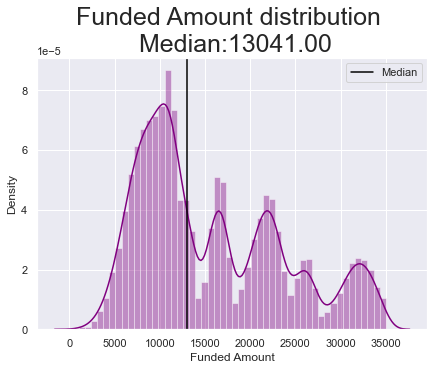

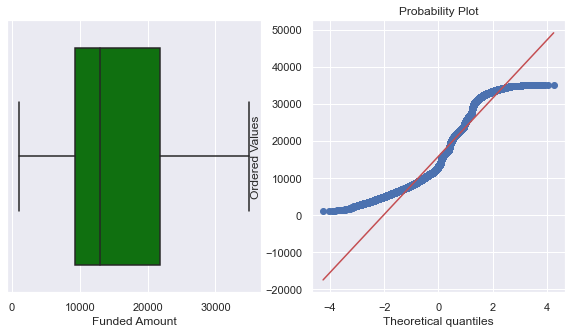

In [303]:
#Funded Amount

plt.figure(figsize=(7,5))
sns.distplot(train_data['Funded Amount'],color='purple')
plt.title('Funded Amount distribution \n Median:{0:.2f}'.format(train_data['Funded Amount'].median()),size=25)
plt.axvline(train_data['Funded Amount'].median(),color='black',label='Median')
plt.legend()

from scipy import stats
from scipy.stats import norm, skew
sns.set()
fig3=plt.figure(figsize=(10,5))
ax1=fig3.add_subplot(121)
sns.boxplot(train_data['Funded Amount'],orient='v',ax=ax1,color='green')
ax2=fig3.add_subplot(122)
stats.probplot(train_data['Funded Amount'],plot=ax2)

train_data['Funded Amount'].describe()

count    67358.000000
mean     14621.927925
std       6785.527811
min       1114.590204
25%       9831.365529
50%      12793.847630
75%      17809.272575
max      34999.746430
Name: Funded Amount Investor, dtype: float64

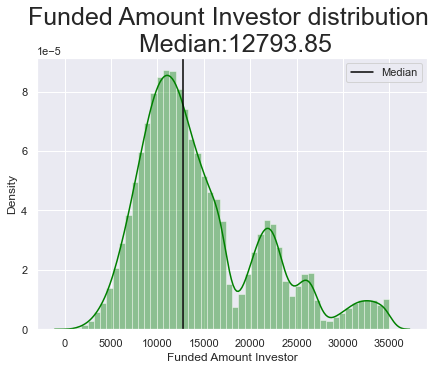

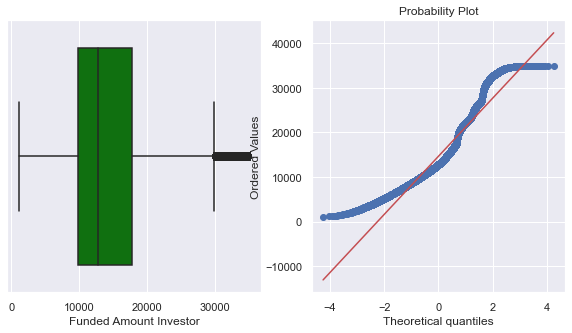

In [304]:
#Funded Amount Investor

plt.figure(figsize=(7,5))
sns.distplot(train_data['Funded Amount Investor'],color='green')
plt.title('Funded Amount Investor distribution \n Median:{0:.2f}'.format(train_data['Funded Amount Investor'].median()),size=25)
plt.axvline(train_data['Funded Amount Investor'].median(),color='black',label='Median')
plt.legend()

from scipy import stats
from scipy.stats import norm, skew
sns.set()
fig3=plt.figure(figsize=(10,5))
ax1=fig3.add_subplot(121)
sns.boxplot(train_data['Funded Amount Investor'],orient='v',ax=ax1,color='green')
ax2=fig3.add_subplot(122)
stats.probplot(train_data['Funded Amount Investor'],plot=ax2)

train_data['Funded Amount Investor'].describe()

count    67358.000000
mean        11.846041
std          3.718535
min          5.320006
25%          9.296850
50%         11.377821
75%         14.193293
max         27.182348
Name: Interest Rate, dtype: float64

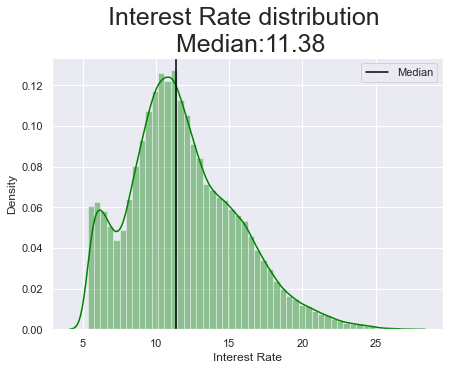

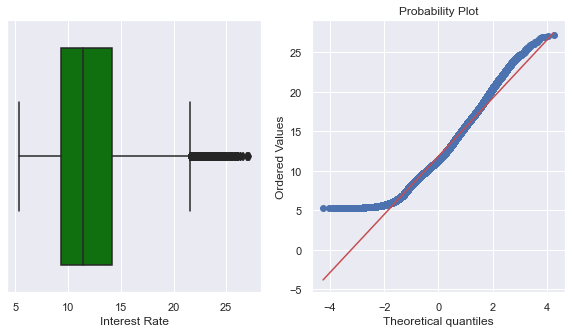

In [305]:
#Interest Rate

plt.figure(figsize=(7,5))
sns.distplot(train_data['Interest Rate'],color='green')
plt.title('Interest Rate distribution \n Median:{0:.2f}'.format(train_data['Interest Rate'].median()),size=25)
plt.axvline(train_data['Interest Rate'].median(),color='black',label='Median')
plt.legend()

from scipy import stats
from scipy.stats import norm, skew
sns.set()
fig3=plt.figure(figsize=(10,5))
ax1=fig3.add_subplot(121)
sns.boxplot(train_data['Interest Rate'],orient='v',ax=ax1,color='green')
ax2=fig3.add_subplot(122)
stats.probplot(train_data['Interest Rate'],plot=ax2)

train_data['Interest Rate'].describe()

count     67358.000000
mean      80526.279755
std       45006.243081
min       14573.537170
25%       51693.760452
50%       69324.611785
75%       94597.007928
max      406561.536400
Name: Duration, dtype: float64

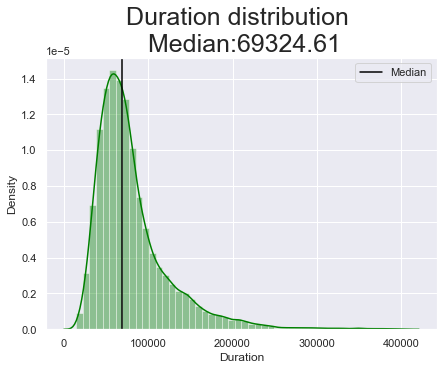

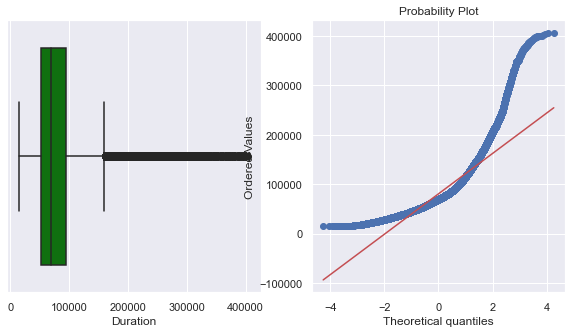

In [306]:
#Duration

plt.figure(figsize=(7,5))
sns.distplot(train_data['Duration'],color='green')
plt.title('Duration distribution \n Median:{0:.2f}'.format(train_data['Duration'].median()),size=25)
plt.axvline(train_data['Duration'].median(),color='black',label='Median')
plt.legend()

from scipy import stats
from scipy.stats import norm, skew
sns.set()
fig3=plt.figure(figsize=(10,5))
ax1=fig3.add_subplot(121)
sns.boxplot(train_data['Duration'],orient='v',ax=ax1,color='green')
ax2=fig3.add_subplot(122)
stats.probplot(train_data['Duration'],plot=ax2)

train_data['Duration'].describe()

count    67358.000000
mean        23.303102
std          8.453193
min          0.675299
25%         16.759371
50%         22.663559
75%         30.056152
max         39.629862
Name: Debit to Income, dtype: float64

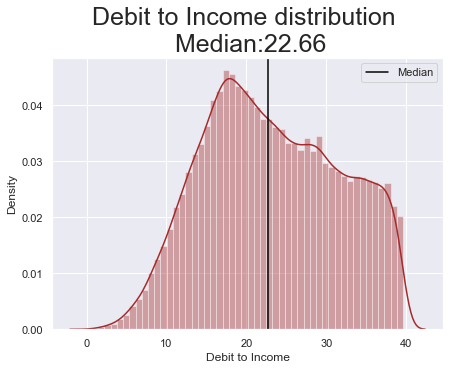

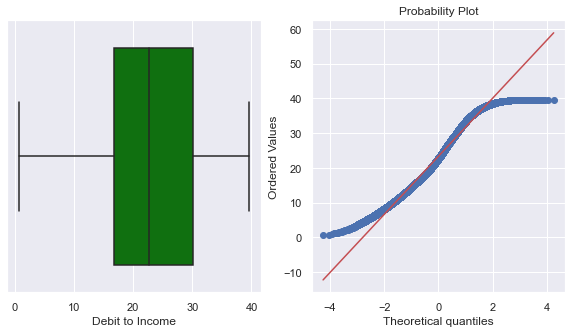

In [307]:
#Debit to Income

plt.figure(figsize=(7,5))
sns.distplot(train_data['Debit to Income'],color='brown')
plt.title('Debit to Income distribution \n Median:{0:.2f}'.format(train_data['Debit to Income'].median()),size=25)
plt.axvline(train_data['Debit to Income'].median(),color='black',label='Median')
plt.legend()

from scipy import stats
from scipy.stats import norm, skew
sns.set()
fig3=plt.figure(figsize=(10,5))
ax1=fig3.add_subplot(121)
sns.boxplot(train_data['Debit to Income'],orient='v',ax=ax1,color='green')
ax2=fig3.add_subplot(122)
stats.probplot(train_data['Debit to Income'],plot=ax2)

train_data['Debit to Income'].describe()

count     67358.000000
mean       7699.955818
std        7836.387130
min           0.000000
25%        2558.000000
50%        5517.500000
75%       10184.000000
max      116933.000000
Name: Revolving Balance, dtype: float64

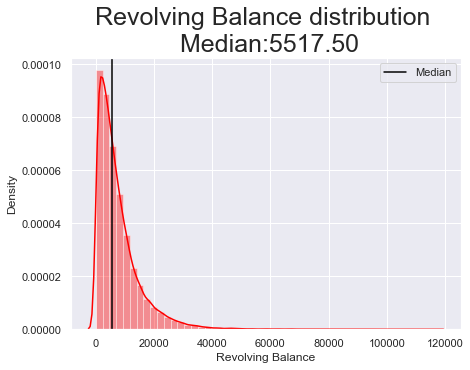

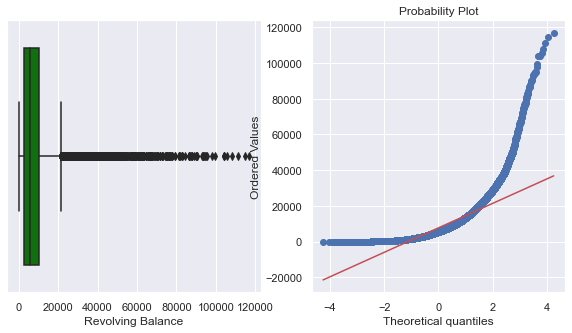

In [308]:
#Revolving Balance

plt.figure(figsize=(7,5))
sns.distplot(train_data['Revolving Balance'],color='red')
plt.title('Revolving Balance distribution \n Median:{0:.2f}'.format(train_data['Revolving Balance'].median()),size=25)
plt.axvline(train_data['Revolving Balance'].median(),color='black',label='Median')
plt.legend()

from scipy import stats
from scipy.stats import norm, skew
sns.set()
fig3=plt.figure(figsize=(10,5))
ax1=fig3.add_subplot(121)
sns.boxplot(train_data['Revolving Balance'],orient='v',ax=ax1,color='green')
ax2=fig3.add_subplot(122)
stats.probplot(train_data['Revolving Balance'],plot=ax2)

train_data['Revolving Balance'].describe()

count    67358.000000
mean        52.886699
std         22.537876
min          0.005172
25%         38.659026
50%         54.075351
75%         69.172232
max        100.880050
Name: Revolving Utilities, dtype: float64

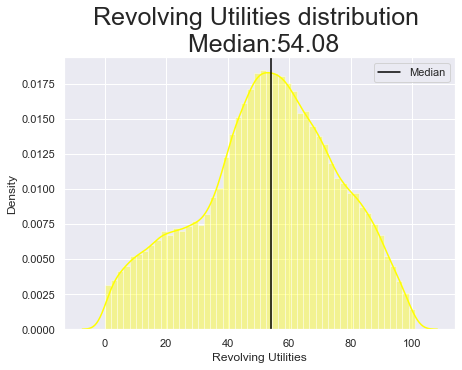

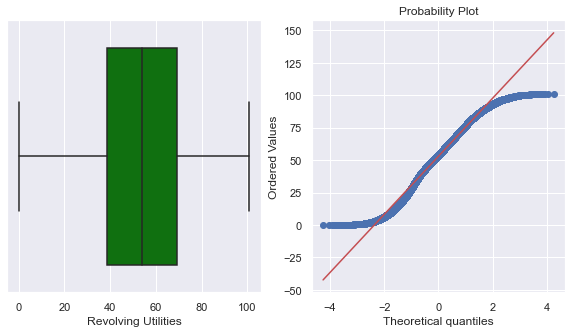

In [309]:
#Revolving Utilities

plt.figure(figsize=(7,5))
sns.distplot(train_data['Revolving Utilities'],color='yellow')
plt.title('Revolving Utilities distribution \n Median:{0:.2f}'.format(train_data['Revolving Utilities'].median()),size=25)
plt.axvline(train_data['Revolving Utilities'].median(),color='black',label='Median')
plt.legend()

from scipy import stats
from scipy.stats import norm, skew
sns.set()
fig3=plt.figure(figsize=(10,5))
ax1=fig3.add_subplot(121)
sns.boxplot(train_data['Revolving Utilities'],orient='v',ax=ax1,color='green')
ax2=fig3.add_subplot(122)
stats.probplot(train_data['Revolving Utilities'],plot=ax2)

train_data['Revolving Utilities'].describe()

count    67358.000000
mean         1.104627
std          5.094318
min          0.000003
25%          0.021086
50%          0.043338
75%          0.071787
max         39.992831
Name: Total Received Late Fee, dtype: float64

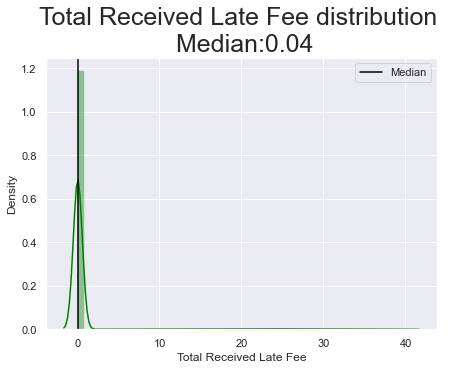

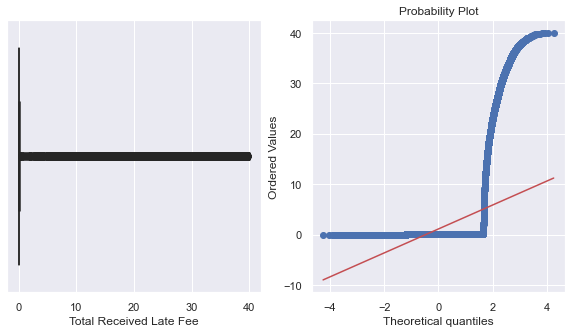

In [310]:
#Total Received Late Fee

plt.figure(figsize=(7,5))
sns.distplot(train_data['Total Received Late Fee'],color='green')
plt.title('Total Received Late Fee distribution \n Median:{0:.2f}'.format(train_data['Total Received Late Fee'].median()),size=25)
plt.axvline(train_data['Total Received Late Fee'].median(),color='black',label='Median')
plt.legend()

from scipy import stats
from scipy.stats import norm, skew
sns.set()
fig3=plt.figure(figsize=(10,5))
ax1=fig3.add_subplot(121)
sns.boxplot(train_data['Total Received Late Fee'],orient='v',ax=ax1,color='green')
ax2=fig3.add_subplot(122)
stats.probplot(train_data['Total Received Late Fee'],plot=ax2)

train_data['Total Received Late Fee'].describe()

count    67358.000000
mean        59.690620
std        357.179545
min          0.000036
25%          1.629962
50%          3.344384
75%          5.451985
max       4354.467419
Name: Recoveries, dtype: float64

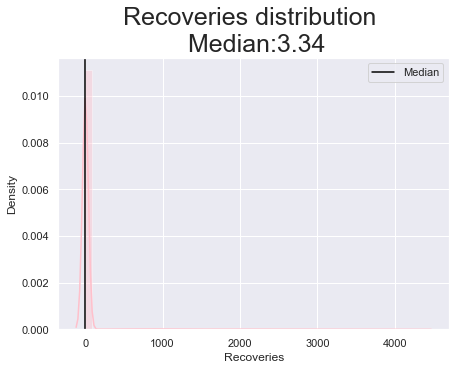

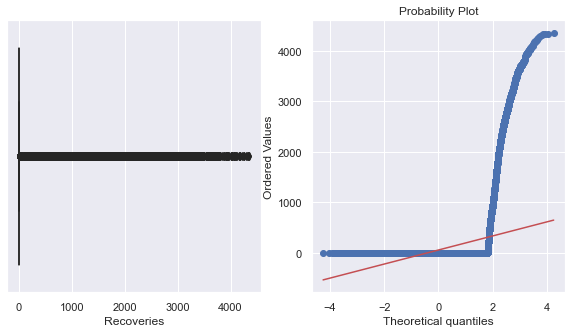

In [311]:
#Recoveries

plt.figure(figsize=(7,5))
sns.distplot(train_data['Recoveries'],color='pink')
plt.title('Recoveries distribution \n Median:{0:.2f}'.format(train_data['Recoveries'].median()),size=25)
plt.axvline(train_data['Recoveries'].median(),color='black',label='Median')
plt.legend()

from scipy import stats
from scipy.stats import norm, skew
sns.set()
fig3=plt.figure(figsize=(10,5))
ax1=fig3.add_subplot(121)
sns.boxplot(train_data['Recoveries'],orient='v',ax=ax1,color='green')
ax2=fig3.add_subplot(122)
stats.probplot(train_data['Recoveries'],plot=ax2)

train_data['Recoveries'].describe()

count    67358.000000
mean         1.122164
std          3.428711
min          0.000036
25%          0.476116
50%          0.780111
75%          1.070497
max         54.222788
Name: Collection Recovery Fee, dtype: float64

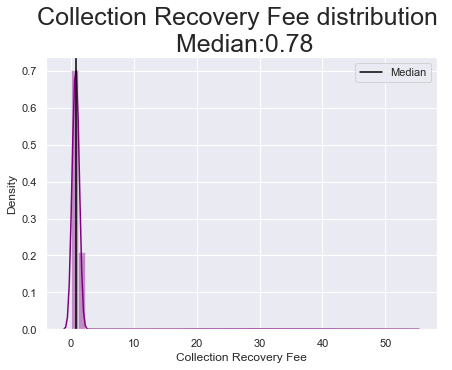

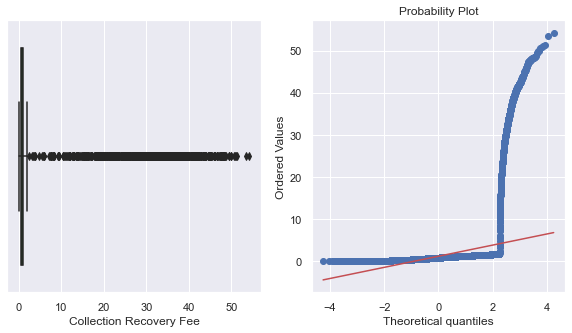

In [312]:
#Collection Recovery Fee

plt.figure(figsize=(7,5))
sns.distplot(train_data['Collection Recovery Fee'],color='purple')
plt.title('Collection Recovery Fee distribution \n Median:{0:.2f}'.format(train_data['Collection Recovery Fee'].median()),size=25)
plt.axvline(train_data['Collection Recovery Fee'].median(),color='black',label='Median')
plt.legend()

from scipy import stats
from scipy.stats import norm, skew
sns.set()
fig3=plt.figure(figsize=(10,5))
ax1=fig3.add_subplot(121)
sns.boxplot(train_data['Collection Recovery Fee'],orient='v',ax=ax1,color='green')
ax2=fig3.add_subplot(122)
stats.probplot(train_data['Collection Recovery Fee'],plot=ax2)

train_data['Collection Recovery Fee'].describe()

count     67358.000000
mean     159056.378619
std      137397.672672
min         617.000000
25%       50343.250000
50%      118241.000000
75%      228129.500000
max      999766.000000
Name: Total Current Balance, dtype: float64

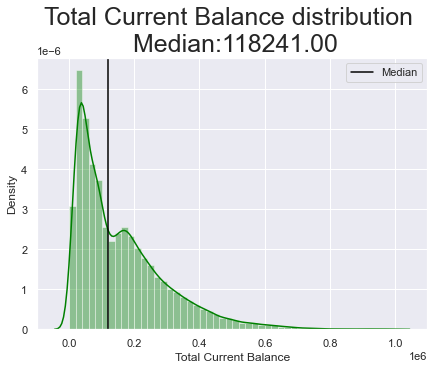

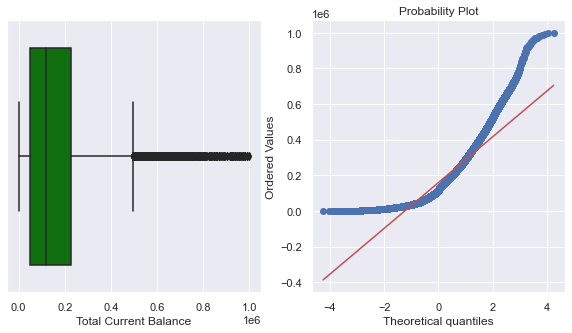

In [313]:
#Total Current Balance

plt.figure(figsize=(7,5))
sns.distplot(train_data['Total Current Balance'],color='green')
plt.title('Total Current Balance distribution \n Median:{0:.2f}'.format(train_data['Total Current Balance'].median()),size=25)
plt.axvline(train_data['Total Current Balance'].median(),color='black',label='Median')
plt.legend()

from scipy import stats
from scipy.stats import norm, skew
sns.set()
fig3=plt.figure(figsize=(10,5))
ax1=fig3.add_subplot(121)
sns.boxplot(train_data['Total Current Balance'],orient='v',ax=ax1,color='green')
ax2=fig3.add_subplot(122)
stats.probplot(train_data['Total Current Balance'],plot=ax2)

train_data['Total Current Balance'].describe()

count     67358.000000
mean      23119.844042
std       20912.233063
min        1000.000000
25%        8152.250000
50%       16732.500000
75%       32143.750000
max      201169.000000
Name: Total Revolving Credit Limit, dtype: float64

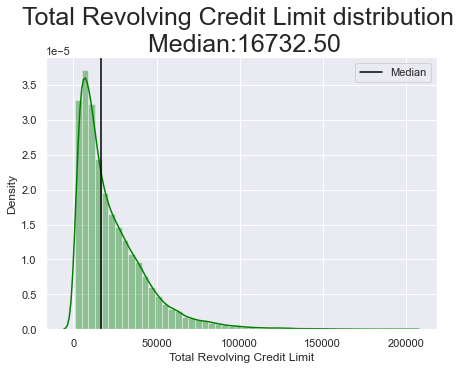

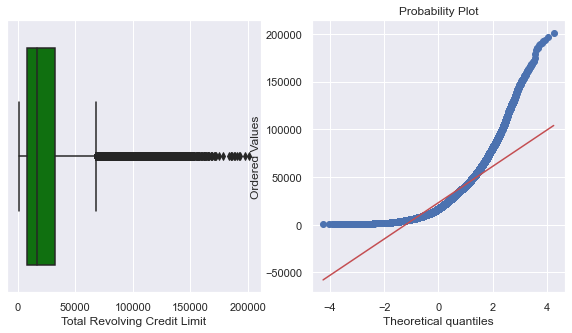

In [314]:
#Total Revolving Credit Limit

plt.figure(figsize=(7,5))
sns.distplot(train_data['Total Revolving Credit Limit'],color='green')
plt.title('Total Revolving Credit Limit distribution \n Median:{0:.2f}'.format(train_data['Total Revolving Credit Limit'].median()),size=25)
plt.axvline(train_data['Total Revolving Credit Limit'].median(),color='black',label='Median')
plt.legend()

from scipy import stats
from scipy.stats import norm, skew
sns.set()
fig3=plt.figure(figsize=(10,5))
ax1=fig3.add_subplot(121)
sns.boxplot(train_data['Total Revolving Credit Limit'],orient='v',ax=ax1,color='green')
ax2=fig3.add_subplot(122)
stats.probplot(train_data['Total Revolving Credit Limit'],plot=ax2)

train_data['Total Revolving Credit Limit'].describe()

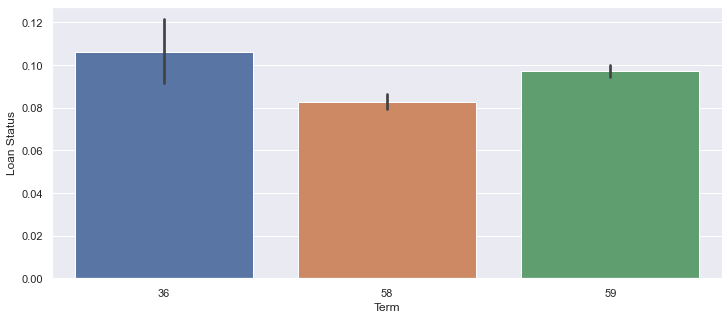

In [315]:
sns.barplot(x='Term', y='Loan Status', data=train_data)
plt.show()

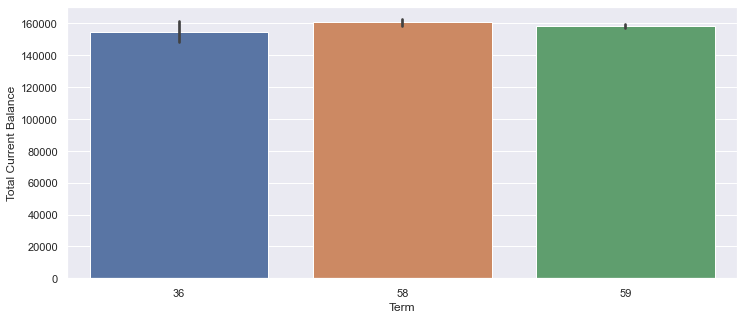

In [316]:
sns.barplot(x='Term', y='Total Current Balance', data=train_data)
plt.show()

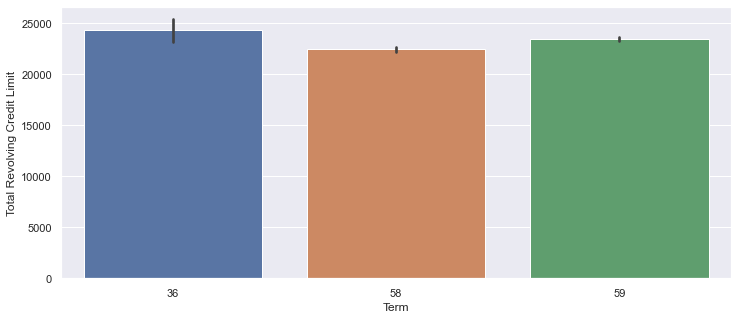

In [317]:
sns.barplot(x='Term', y='Total Revolving Credit Limit', data=train_data)
plt.show()

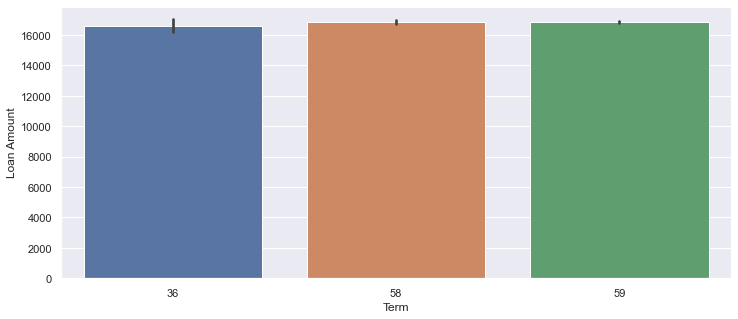

In [318]:
sns.barplot(x='Term', y='Loan Amount', data=train_data)
plt.show()

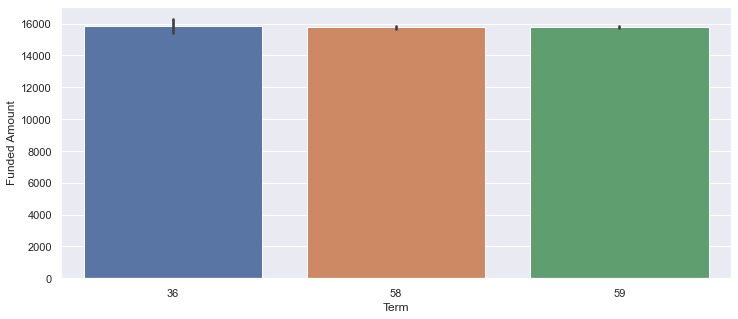

In [319]:
sns.barplot(x='Term', y='Funded Amount', data=train_data)
plt.show()

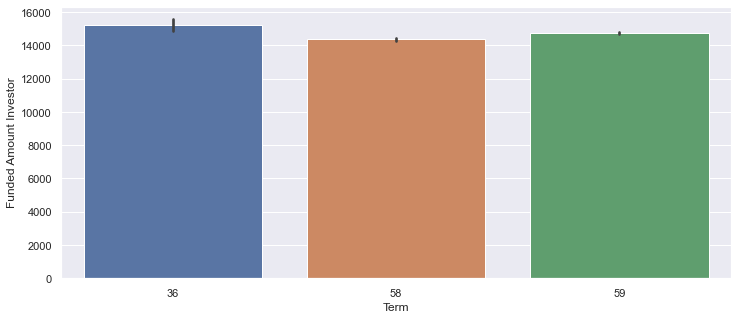

In [320]:
sns.barplot(x='Term', y='Funded Amount Investor', data=train_data)
plt.show()

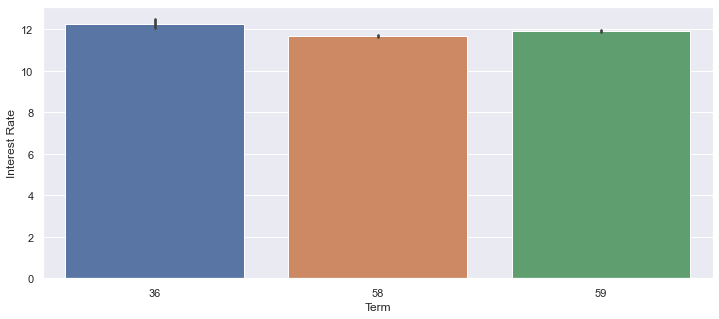

In [321]:
sns.barplot(x='Term', y='Interest Rate', data=train_data)
plt.show()

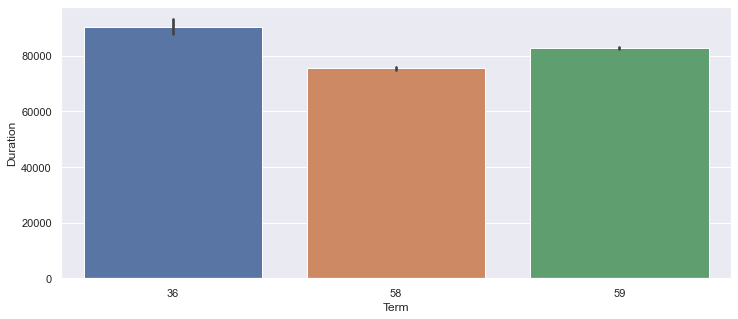

In [322]:
sns.barplot(x='Term', y='Duration', data=train_data)
plt.show()

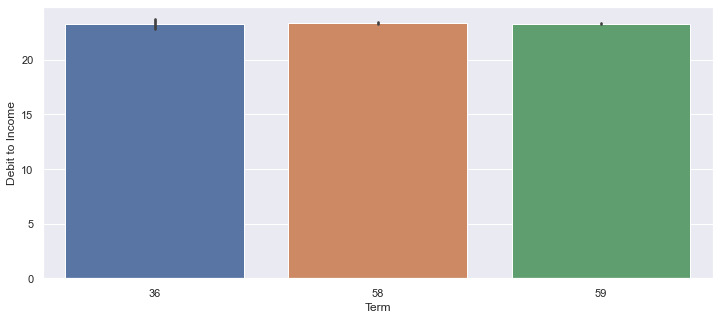

In [323]:
sns.barplot(x='Term', y='Debit to Income', data=train_data)
plt.show()

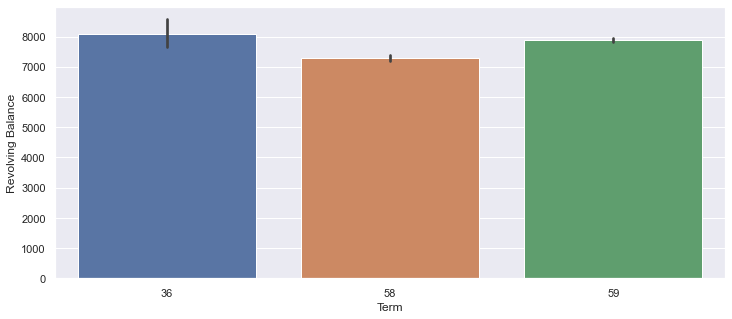

In [324]:
sns.barplot(x='Term', y='Revolving Balance', data=train_data)
plt.show()

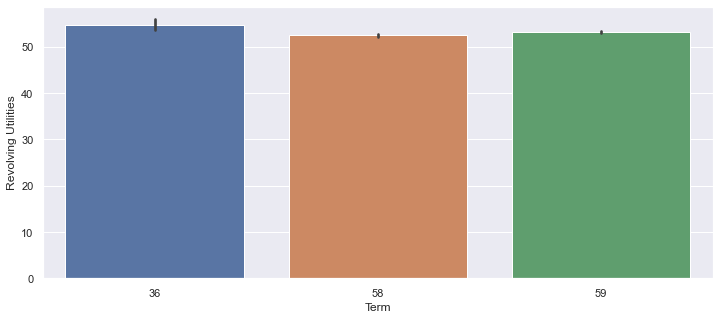

In [325]:
sns.barplot(x='Term', y='Revolving Utilities', data=train_data)
plt.show()

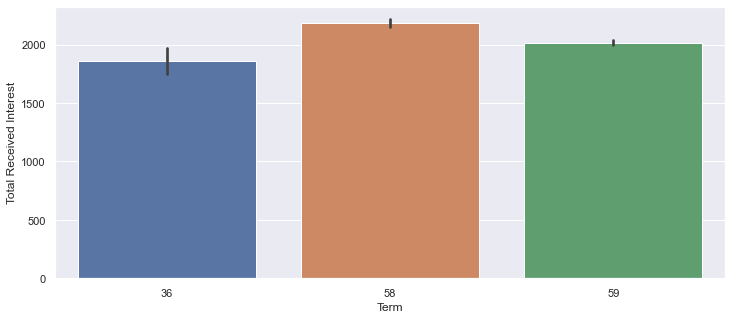

In [326]:
sns.barplot(x='Term', y='Total Received Interest', data=train_data)
plt.show()

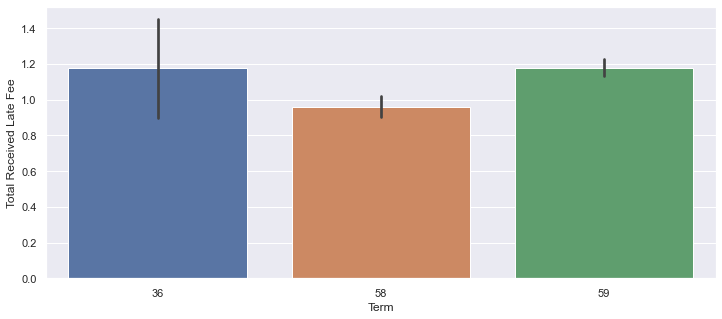

In [327]:
sns.barplot(x='Term', y='Total Received Late Fee', data=train_data)
plt.show()

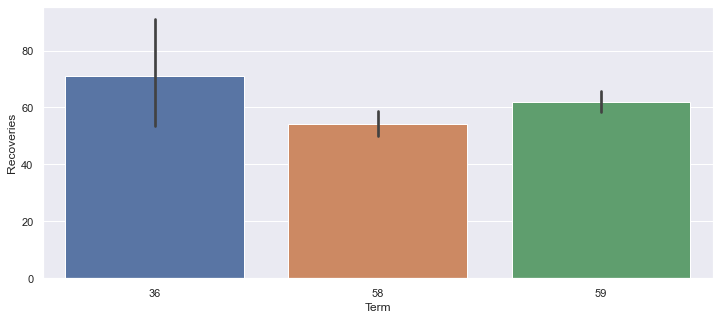

In [328]:
sns.barplot(x='Term', y='Recoveries', data=train_data)
plt.show()

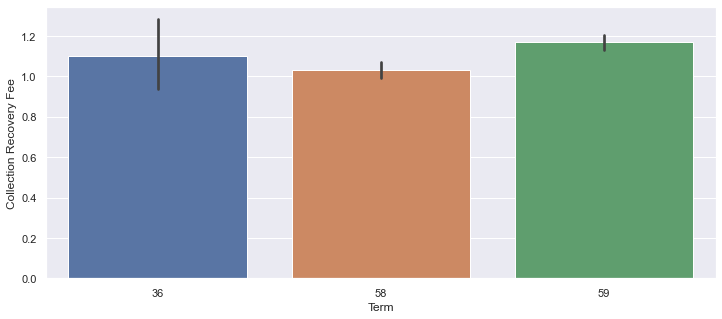

In [329]:
sns.barplot(x='Term', y='Collection Recovery Fee', data=train_data)
plt.show()

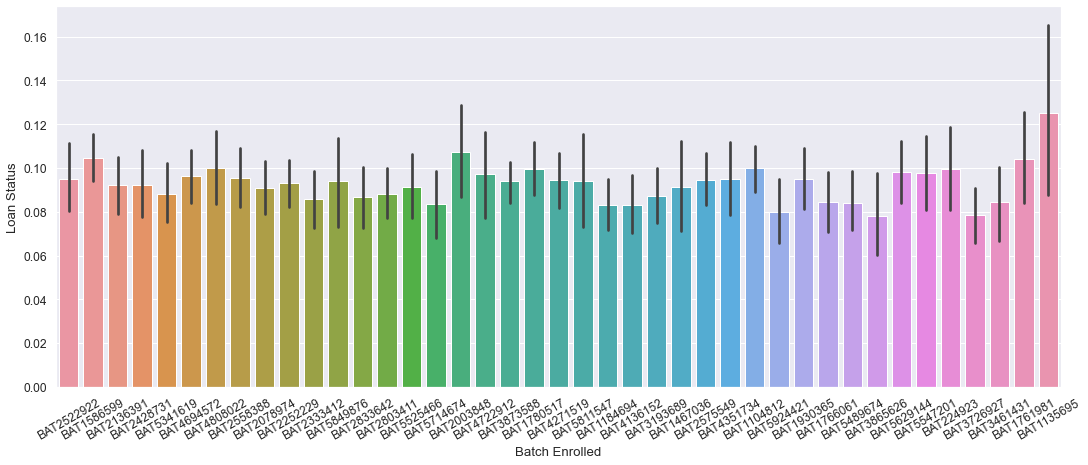

In [330]:
sns.set(style='darkgrid', palette="Set1", font_scale=1.1, rc={"figure.figsize": [18, 7]})
sns.barplot(x='Batch Enrolled', y='Loan Status', data=train_data)
plt.xticks(rotation=30)
plt.show()

In [331]:
train_data.head(1)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Ownership_Type,Duration,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,train_or_test
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.6267,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0,train


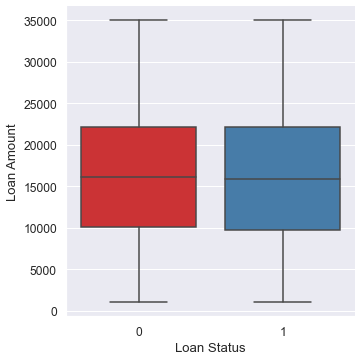

In [332]:
sns.catplot(x='Loan Status',y='Loan Amount',kind='box',data=train_data)

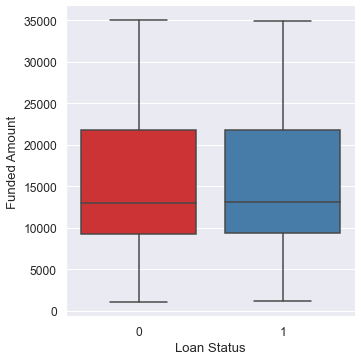

In [333]:
sns.catplot(x='Loan Status',y='Funded Amount',kind='box',data=train_data)

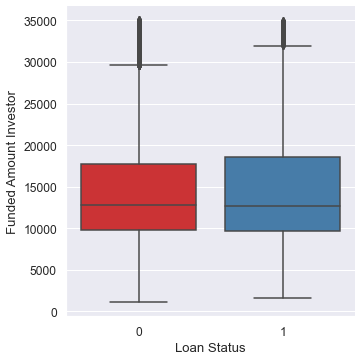

In [334]:
sns.catplot(x='Loan Status',y='Funded Amount Investor',kind='box',data=train_data)

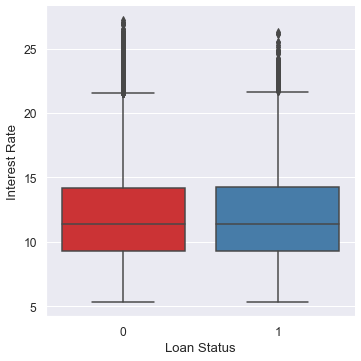

In [335]:
sns.catplot(x='Loan Status',y='Interest Rate',kind='box',data=train_data)

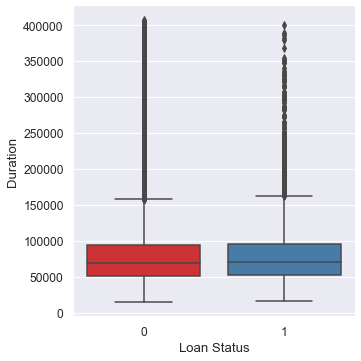

In [336]:
sns.catplot(x='Loan Status',y='Duration',kind='box',data=train_data)

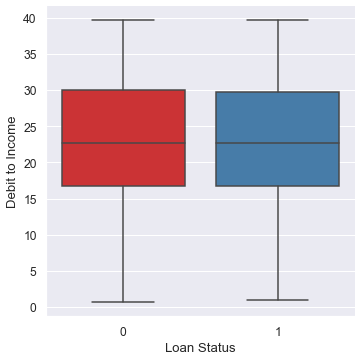

In [337]:
sns.catplot(x='Loan Status',y='Debit to Income',kind='box',data=train_data)

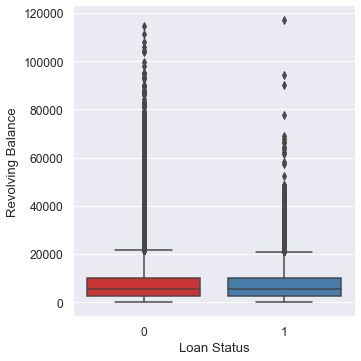

In [338]:
sns.catplot(x='Loan Status',y='Revolving Balance',kind='box',data=train_data)

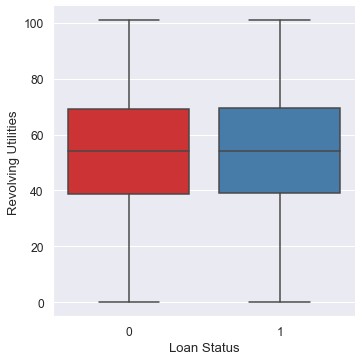

In [339]:
sns.catplot(x='Loan Status',y='Revolving Utilities',kind='box',data=train_data)

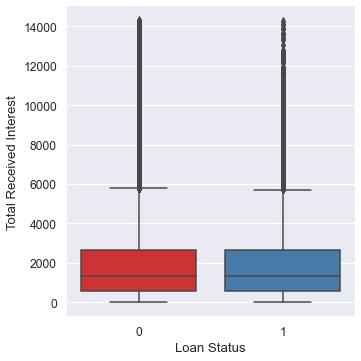

In [340]:
sns.catplot(x='Loan Status',y='Total Received Interest',kind='box',data=train_data)

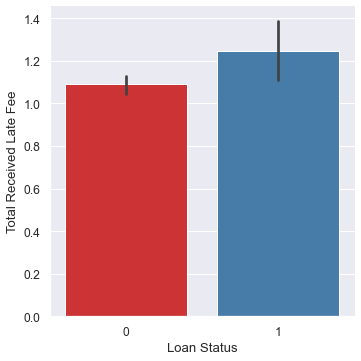

In [341]:
sns.catplot(x='Loan Status',y='Total Received Late Fee',kind='bar',data=train_data)

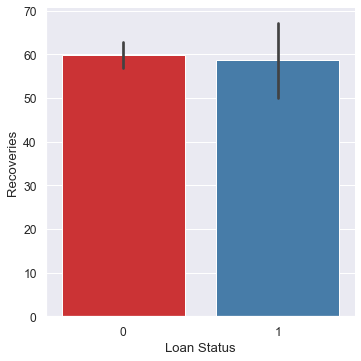

In [342]:
sns.catplot(x='Loan Status',y='Recoveries',kind='bar',data=train_data)

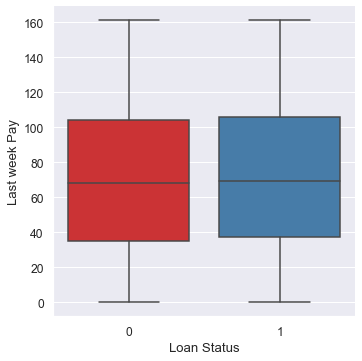

In [343]:
sns.catplot(x='Loan Status',y='Last week Pay',kind='box',data=train_data)

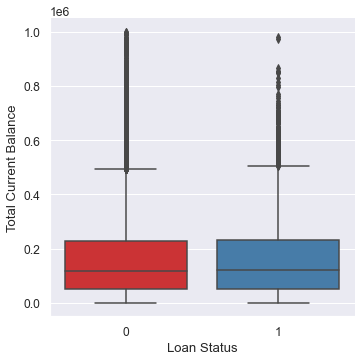

In [344]:
sns.catplot(x='Loan Status',y='Total Current Balance',kind='box',data=train_data)

In [345]:
train_data.sample(1)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Ownership_Type,Duration,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,train_or_test
55311,4979326,16607,30711,19981.18223,59,BAT1184694,5.9319,C,C4,MORTGAGE,91675.24573,Verified,n,Credit card refinancing,32.653509,1,0,5,0,2959,50.23345,16,f,1712.173633,0.052184,5.85187,0.539724,0,INDIVIDUAL,12,0,57,28381,10548,0,train


<AxesSubplot:xlabel='Batch Enrolled'>

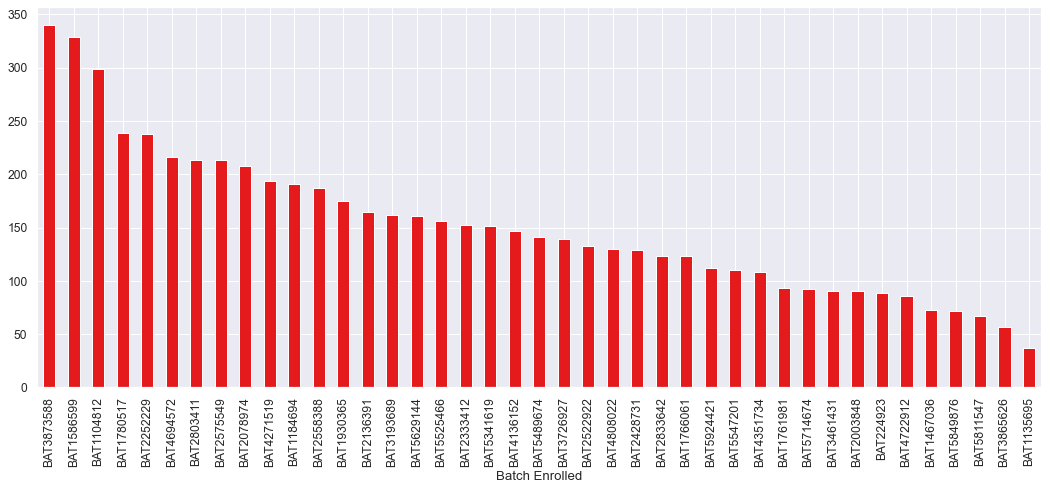

In [346]:
train_data.groupby('Batch Enrolled')['Loan Status'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Batch Enrolled'>

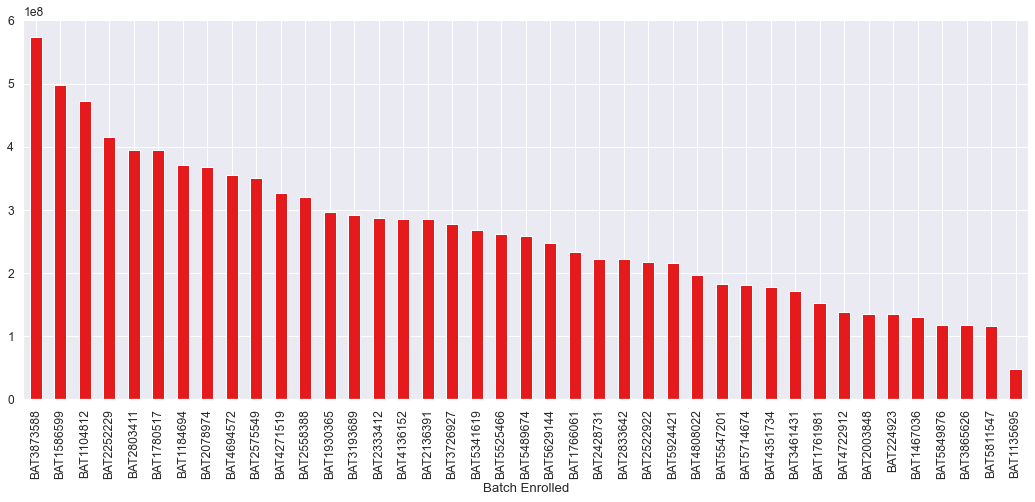

In [347]:
train_data.groupby('Batch Enrolled')['Total Current Balance'].sum().sort_values(ascending=False).plot(kind='bar')

In [348]:
train_data[["Term","Loan Status"]].groupby('Term').mean()

,Loan Status
Term,
36,0.106134
58,0.082657
59,0.097029


In [349]:
test_data['Accounts Delinquent'].value_counts()

0    28885
1       28
Name: Accounts Delinquent, dtype: int64

In [350]:
train_data[["Loan Amount","Funded Amount","Funded Amount Investor"]].sample(5)

,Loan Amount,Funded Amount,Funded Amount Investor
18772,29553,9239,8740.723828
54614,20003,12177,33434.849370
19783,23676,18725,6549.238292
49566,10379,32801,21916.029690
1107,15837,21103,16610.554390


In [351]:
#train_data.loc[(train_data["Loan Amount"]==train_data["Funded Amount"]) & (train_data["Loan Amount"]==train_data["Funded Amount Investor"]),'Accounts Delinquent'] = 1

In [352]:
train_data[(train_data['Accounts Delinquent'] > 0)]

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Ownership_Type,Duration,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,train_or_test


In [353]:
test_data[(test_data['Accounts Delinquent'] > 0)]

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Ownership_Type,Duration,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,train_or_test
22053,68780010,10000,10000,10000.0,36,BAT1586599,9.99,B,B3,MORTGAGE,56000.0,Source Verified,n,Debt consolidation,17.75,7,0,8,0,10565,66.1,19,w,175.61,0.00,0.0,0.0,0,INDIVIDUAL,9,1,0,175749,14700,NaN,test
22148,64060406,3000,3000,3000.0,36,BAT4271519,17.57,D,D4,OWN,50000.0,Verified,n,Medical expenses,29.28,1,0,12,0,6323,44.5,15,f,167.10,0.00,0.0,0.0,0,INDIVIDUAL,17,1,500,47106,14200,NaN,test
22153,67778293,6000,6000,6000.0,36,BAT2252229,11.53,B,B5,RENT,43680.0,Verified,n,Debt consolidation,2.28,1,0,3,3,2067,28.7,8,f,106.26,0.00,0.0,0.0,1,INDIVIDUAL,9,1,0,26924,7200,NaN,test
22216,71291805,14000,14000,14000.0,36,BAT2803411,11.99,C,C1,RENT,96000.0,Not Verified,n,Debt consolidation,15.50,3,0,8,0,11901,87.5,16,f,74.61,0.00,0.0,0.0,0,INDIVIDUAL,4,1,0,40995,13600,NaN,test
22306,70339056,18000,18000,18000.0,59,BAT1586599,15.41,D,D1,MORTGAGE,47000.0,Not Verified,n,Credit card refinancing,30.12,2,0,15,0,20011,49.9,22,w,208.03,0.00,0.0,0.0,0,INDIVIDUAL,4,1,0,123528,40100,NaN,test
22667,65557065,5000,5000,5000.0,36,BAT2252229,16.55,D,D2,RENT,185000.0,Source Verified,n,Moving and relocation,8.13,1,0,17,0,6529,35.5,46,f,124.93,0.00,0.0,0.0,0,INDIVIDUAL,9,1,0,436120,18400,NaN,test
23564,43999016,6500,6500,6500.0,36,BAT5924421,6.92,A,A4,MORTGAGE,63000.0,Not Verified,n,Credit card refinancing,21.73,1,1,24,0,5170,12.2,43,w,331.88,0.00,0.0,0.0,0,INDIVIDUAL,43,1,0,148281,42500,NaN,test
23679,63009899,25000,25000,25000.0,36,BAT4271519,8.18,B,B1,MORTGAGE,170000.0,Not Verified,n,Debt consolidation,17.07,1,1,14,0,14036,28.4,45,f,645.04,0.00,0.0,0.0,0,INDIVIDUAL,17,1,0,804103,49500,NaN,test
23781,51553379,7200,7200,7200.0,36,BAT1184694,12.29,C,C1,RENT,99500.0,Source Verified,n,Debt consolidation,12.56,2,0,11,2,4660,27.3,25,f,447.42,0.00,0.0,0.0,0,INDIVIDUAL,35,1,0,39424,17100,NaN,test
23845,65478352,35000,35000,35000.0,36,BAT2252229,13.33,C,C3,RENT,145000.0,Verified,n,Credit card refinancing,21.34,1,0,19,0,38442,61.9,35,w,1165.67,0.00,0.0,0.0,0,INDIVIDUAL,13,1,100,332654,57400,NaN,test


In [354]:
test_data[["Accounts Delinquent","Loan Status"]].head(5)

,Accounts Delinquent,Loan Status
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN


In [355]:
train_data.shape

(67358, 36)

In [356]:
no_default = train_data[(train_data['Loan Status'] <1)]
no_default.shape

(61128, 36)

In [357]:
no_default["Loan Status"].value_counts()

0    61128
Name: Loan Status, dtype: int64

In [358]:
#default["Loan Status"].value_counts()

In [359]:
default = train_data[(train_data['Loan Status'] > 0 )]
default.shape

(6230, 36)

In [360]:
no_default["Total Current Balance"].describe()

count     61128.000000
mean     158603.382803
std      137085.836184
min         617.000000
25%       50222.750000
50%      117874.000000
75%      227578.000000
max      999766.000000
Name: Total Current Balance, dtype: float64

In [361]:
default["Total Current Balance"].describe()

count      6230.000000
mean     163501.118299
std      140354.327303
min         681.000000
25%       51939.750000
50%      122776.000000
75%      233455.500000
max      979047.000000
Name: Total Current Balance, dtype: float64

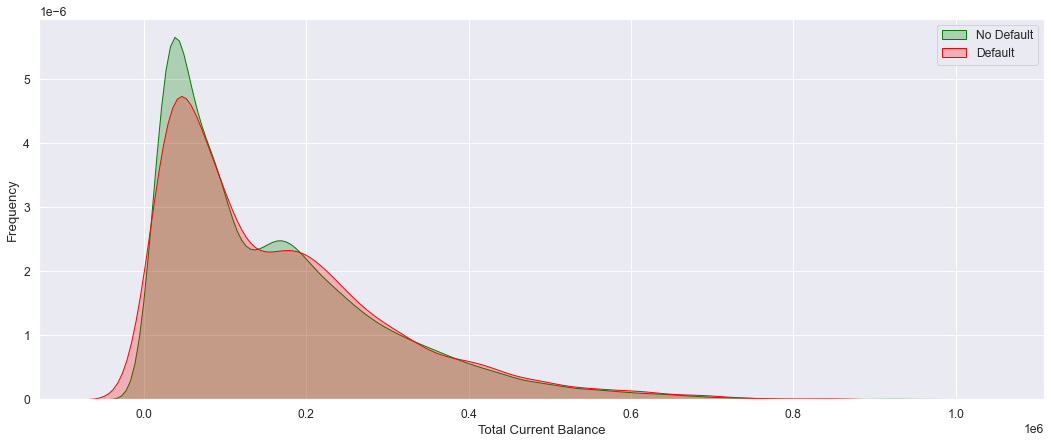

In [362]:
# Explore Age distibution 
g = sns.kdeplot(train_data["Total Current Balance"][(train_data["Loan Status"] == 0.0) & (train_data["Total Current Balance"].notnull())], color="Green", shade = True)
g = sns.kdeplot(train_data["Total Current Balance"][(train_data["Loan Status"] == 1.0) & (train_data["Total Current Balance"].notnull())], ax =g, color="Red", shade= True)
g.set_xlabel("Total Current Balance")
g.set_ylabel("Frequency")
g = g.legend(["No Default","Default"])

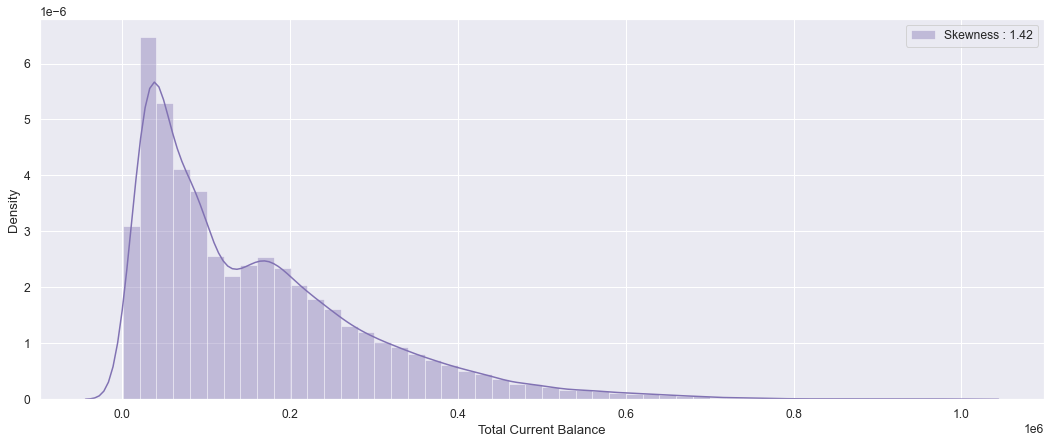

In [363]:
# Explore Fare distribution 
g = sns.distplot(train_data["Total Current Balance"], color="m", label="Skewness : %.2f"%(train_data["Total Current Balance"].skew()))
g = g.legend(loc="best")

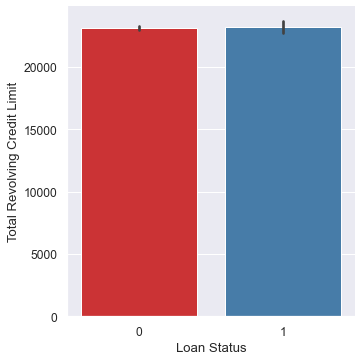

In [364]:
sns.catplot(x='Loan Status',y='Total Revolving Credit Limit',kind='bar',data=train_data)

In [365]:
len(train_data["Last week Pay"].value_counts())

162

In [366]:
### EDA Ends ###

In [367]:
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Ownership_Type,Duration,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,train_or_test,Loan_Type
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0.0,train,Debt_Consolidation_Loan
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0.0,train,Debt_Consolidation_Loan
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0.0,train,Debt_Consolidation_Loan
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0.0,train,Debt_Consolidation_Loan
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0.0,train,REFI_LOAN


In [368]:
df.shape

(96271, 37)

In [369]:
### Feature Engineering starts ###

In [370]:
#EMI
#Lets assume that interest rate=10.0 # hence r = ((10/12)/100) = 0.00833

#r = 0.00833
#combine_set['EMI']=combine_set.apply(lambda x: (x['LoanAmount']*r*((1+r)**x['Loan_Amount_Term']))/((1+r)**((x['Loan_Amount_Term'])-1)),axis=1)

In [371]:
### Feature Engineering Ends ###

In [372]:
df.Term.value_counts()

59    60606
58    28729
36     6936
Name: Term, dtype: int64

In [373]:
df.head(1)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Ownership_Type,Duration,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,train_or_test,Loan_Type
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.6267,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0.0,train,Debt_Consolidation_Loan


In [374]:
def preparedatafortraining(df):
    
    train=df.loc[df.train_or_test.isin(['train'])]
    test=df.loc[df.train_or_test.isin(['test'])]
    
    target=['Loan Status']
    y=train[target]
    
       
    drop_columns={'Loan Status','train_or_test','ID','Payment Plan','Loan Title','Accounts Delinquent'}
    
    '''drop_columns={'ID', 'Payment Plan', 'Accounts Delinquent', 'Batch Enrolled',
                          'Grade', 'Sub Grade', 'Employment Duration', 'Verification Status',
                          'Loan Title', 'Initial List Status', 'Application Type', 'Loan Status'}'''
        
    train_corr = train.copy()
    
    train=train.drop(columns=drop_columns,axis=1)
    test=test.drop(columns=drop_columns,axis=1)    
    
    train_df = pd.get_dummies(train, drop_first = True)
    test_df = pd.get_dummies(test, drop_first = True)
    
    
    drop_columns_corr={'train_or_test','ID','Payment Plan','Loan Title','Accounts Delinquent'}
    train_corr=train_corr.drop(columns=drop_columns_corr,axis=1)
    train_corr_df = pd.get_dummies(train_corr, drop_first = True)
         
    print("Train dataset shape: {0}, \nTest dataset shape: {1}".format(train_df.shape, test_df.shape))
    
    return train_df,y,test_df,train_corr_df

In [375]:
X,y,test,train_corr=preparedatafortraining(df)

print(X.shape)
print(y.shape)
print(test.shape)

Train dataset shape: (67358, 400), 
Test dataset shape: (28913, 400)
(67358, 400)
(67358, 1)
(28913, 400)


In [376]:
corr_matrix=train_corr.corr()
#corr_matrix['Sales']
corr_matrix.sort_values('Loan Status', ascending=False)["Loan Status"]

Loan Status                            1.000000
Term_59                                0.021301
Total Accounts_69                      0.012069
Ownership_Type_OWN                     0.010693
Total Current Balance                  0.010327
Last week Pay_51                       0.009573
Batch Enrolled_BAT1586599              0.009377
Total Accounts_33                      0.009130
Delinquency - two years_6              0.008995
Total Received Late Fee                0.008942
Public Record_4                        0.008933
Last week Pay_108                      0.008557
Ownership_Type_RENT                    0.008245
Total Accounts_5                       0.007878
Last week Pay_83                       0.007864
Sub Grade_G3                           0.007855
Total Collection Amount                0.007837
Batch Enrolled_BAT1135695              0.007455
Grade_F                                0.007379
Loan_Type_Debt_Free                    0.007321
Last week Pay_130                      0

In [377]:
X.head(1)

,Loan Amount,Funded Amount,Funded Amount Investor,Interest Rate,Duration,Debit to Income,Revolving Balance,Revolving Utilities,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Term_58,Term_59,Batch Enrolled_BAT1135695,Batch Enrolled_BAT1184694,Batch Enrolled_BAT1467036,Batch Enrolled_BAT1586599,Batch Enrolled_BAT1761981,Batch Enrolled_BAT1766061,Batch Enrolled_BAT1780517,Batch Enrolled_BAT1930365,Batch Enrolled_BAT2003848,Batch Enrolled_BAT2078974,Batch Enrolled_BAT2136391,Batch Enrolled_BAT224923,Batch Enrolled_BAT2252229,Batch Enrolled_BAT2333412,Batch Enrolled_BAT2428731,Batch Enrolled_BAT2522922,Batch Enrolled_BAT2558388,Batch Enrolled_BAT2575549,Batch Enrolled_BAT2803411,Batch Enrolled_BAT2833642,Batch Enrolled_BAT3193689,Batch Enrolled_BAT3461431,Batch Enrolled_BAT3726927,Batch Enrolled_BAT3865626,Batch Enrolled_BAT3873588,Batch Enrolled_BAT4136152,Batch Enrolled_BAT4271519,Batch Enrolled_BAT4351734,Batch Enrolled_BAT4694572,Batch Enrolled_BAT4722912,Batch Enrolled_BAT4808022,Batch Enrolled_BAT5341619,Batch Enrolled_BAT5489674,Batch Enrolled_BAT5525466,Batch Enrolled_BAT5547201,Batch Enrolled_BAT5629144,Batch Enrolled_BAT5714674,Batch Enrolled_BAT5811547,Batch Enrolled_BAT5849876,Batch Enrolled_BAT5924421,Grade_B,Grade_C,Grade_D,Grade_E,Grade_F,Grade_G,Sub Grade_A2,Sub Grade_A3,Sub Grade_A4,Sub Grade_A5,Sub Grade_B1,Sub Grade_B2,Sub Grade_B3,Sub Grade_B4,Sub Grade_B5,Sub Grade_C1,Sub Grade_C2,Sub Grade_C3,Sub Grade_C4,Sub Grade_C5,Sub Grade_D1,Sub Grade_D2,Sub Grade_D3,Sub Grade_D4,Sub Grade_D5,Sub Grade_E1,Sub Grade_E2,Sub Grade_E3,Sub Grade_E4,Sub Grade_E5,Sub Grade_F1,Sub Grade_F2,Sub Grade_F3,Sub Grade_F4,Sub Grade_F5,Sub Grade_G1,Sub Grade_G2,Sub Grade_G3,Sub Grade_G4,Sub Grade_G5,Ownership_Type_OWN,Ownership_Type_RENT,Verification Status_Source Verified,Verification Status_Verified,Delinquency - two years_1,Delinquency - two years_2,Delinquency - two years_3,Delinquency - two years_4,Delinquency - two years_5,Delinquency - two years_6,Delinquency - two years_7,Delinquency - two years_8,Inquires - six months_1,Inquires - six months_2,Inquires - six months_3,Inquires - six months_4,Inquires - six months_5,Open Account_3,Open Account_4,Open Account_5,Open Account_6,Open Account_7,Open Account_8,Open Account_9,Open Account_10,Open Account_11,Open Account_12,Open Account_13,Open Account_14,Open Account_15,Open Account_16,Open Account_17,Open Account_18,Open Account_19,Open Account_20,Open Account_21,Open Account_22,Open Account_23,Open Account_24,Open Account_25,Open Account_26,Open Account_27,Open Account_28,Open Account_29,Open Account_30,Open Account_31,Open Account_32,Open Account_33,Open Account_34,Open Account_35,Open Account_36,Open Account_37,Public Record_1,Public Record_2,Public Record_3,Public Record_4,Total Accounts_5,Total Accounts_6,Total Accounts_7,Total Accounts_8,Total Accounts_9,Total Accounts_10,Total Accounts_11,Total Accounts_12,Total Accounts_13,Total Accounts_14,Total Accounts_15,Total Accounts_16,Total Accounts_17,Total Accounts_18,Total Accounts_19,Total Accounts_20,Total Accounts_21,Total Accounts_22,Total Accounts_23,Total Accounts_24,Total Accounts_25,Total Accounts_26,Total Accounts_27,Total Accounts_28,Total Accounts_29,Total Accounts_30,Total Accounts_31,Total Accounts_32,Total Accounts_33,Total Accounts_34,Total Accounts_35,Total Accounts_36,Total Accounts_37,Total Accounts_38,Total Accounts_39,Total Accounts_40,Total Accounts_41,Total Accounts_42,Total Accounts_43,Total Accounts_44,Total Accounts_45,Total Accounts_46,Total Accounts_47,Total Accounts_48,Total Accounts_49,Total Accounts_50,Total Accounts_51,Total Accounts_52,Total Accounts_53,Total Accounts_54,Total Accounts_55,Total Accounts_56,Total Accounts_57,Total Accounts_58,Total Accounts_59,Total Accounts_60,Total Accounts_61,Total Accounts_62,Total Accounts_63,Total Accounts_64,Total Accounts_65

In [378]:
test.head(1)

,Loan Amount,Funded Amount,Funded Amount Investor,Interest Rate,Duration,Debit to Income,Revolving Balance,Revolving Utilities,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Term_58,Term_59,Batch Enrolled_BAT1135695,Batch Enrolled_BAT1184694,Batch Enrolled_BAT1467036,Batch Enrolled_BAT1586599,Batch Enrolled_BAT1761981,Batch Enrolled_BAT1766061,Batch Enrolled_BAT1780517,Batch Enrolled_BAT1930365,Batch Enrolled_BAT2003848,Batch Enrolled_BAT2078974,Batch Enrolled_BAT2136391,Batch Enrolled_BAT224923,Batch Enrolled_BAT2252229,Batch Enrolled_BAT2333412,Batch Enrolled_BAT2428731,Batch Enrolled_BAT2522922,Batch Enrolled_BAT2558388,Batch Enrolled_BAT2575549,Batch Enrolled_BAT2803411,Batch Enrolled_BAT2833642,Batch Enrolled_BAT3193689,Batch Enrolled_BAT3461431,Batch Enrolled_BAT3726927,Batch Enrolled_BAT3865626,Batch Enrolled_BAT3873588,Batch Enrolled_BAT4136152,Batch Enrolled_BAT4271519,Batch Enrolled_BAT4351734,Batch Enrolled_BAT4694572,Batch Enrolled_BAT4722912,Batch Enrolled_BAT4808022,Batch Enrolled_BAT5341619,Batch Enrolled_BAT5489674,Batch Enrolled_BAT5525466,Batch Enrolled_BAT5547201,Batch Enrolled_BAT5629144,Batch Enrolled_BAT5714674,Batch Enrolled_BAT5811547,Batch Enrolled_BAT5849876,Batch Enrolled_BAT5924421,Grade_B,Grade_C,Grade_D,Grade_E,Grade_F,Grade_G,Sub Grade_A2,Sub Grade_A3,Sub Grade_A4,Sub Grade_A5,Sub Grade_B1,Sub Grade_B2,Sub Grade_B3,Sub Grade_B4,Sub Grade_B5,Sub Grade_C1,Sub Grade_C2,Sub Grade_C3,Sub Grade_C4,Sub Grade_C5,Sub Grade_D1,Sub Grade_D2,Sub Grade_D3,Sub Grade_D4,Sub Grade_D5,Sub Grade_E1,Sub Grade_E2,Sub Grade_E3,Sub Grade_E4,Sub Grade_E5,Sub Grade_F1,Sub Grade_F2,Sub Grade_F3,Sub Grade_F4,Sub Grade_F5,Sub Grade_G1,Sub Grade_G2,Sub Grade_G3,Sub Grade_G4,Sub Grade_G5,Ownership_Type_OWN,Ownership_Type_RENT,Verification Status_Source Verified,Verification Status_Verified,Delinquency - two years_1,Delinquency - two years_2,Delinquency - two years_3,Delinquency - two years_4,Delinquency - two years_5,Delinquency - two years_6,Delinquency - two years_7,Delinquency - two years_8,Inquires - six months_1,Inquires - six months_2,Inquires - six months_3,Inquires - six months_4,Inquires - six months_5,Open Account_3,Open Account_4,Open Account_5,Open Account_6,Open Account_7,Open Account_8,Open Account_9,Open Account_10,Open Account_11,Open Account_12,Open Account_13,Open Account_14,Open Account_15,Open Account_16,Open Account_17,Open Account_18,Open Account_19,Open Account_20,Open Account_21,Open Account_22,Open Account_23,Open Account_24,Open Account_25,Open Account_26,Open Account_27,Open Account_28,Open Account_29,Open Account_30,Open Account_31,Open Account_32,Open Account_33,Open Account_34,Open Account_35,Open Account_36,Open Account_37,Public Record_1,Public Record_2,Public Record_3,Public Record_4,Total Accounts_5,Total Accounts_6,Total Accounts_7,Total Accounts_8,Total Accounts_9,Total Accounts_10,Total Accounts_11,Total Accounts_12,Total Accounts_13,Total Accounts_14,Total Accounts_15,Total Accounts_16,Total Accounts_17,Total Accounts_18,Total Accounts_19,Total Accounts_20,Total Accounts_21,Total Accounts_22,Total Accounts_23,Total Accounts_24,Total Accounts_25,Total Accounts_26,Total Accounts_27,Total Accounts_28,Total Accounts_29,Total Accounts_30,Total Accounts_31,Total Accounts_32,Total Accounts_33,Total Accounts_34,Total Accounts_35,Total Accounts_36,Total Accounts_37,Total Accounts_38,Total Accounts_39,Total Accounts_40,Total Accounts_41,Total Accounts_42,Total Accounts_43,Total Accounts_44,Total Accounts_45,Total Accounts_46,Total Accounts_47,Total Accounts_48,Total Accounts_49,Total Accounts_50,Total Accounts_51,Total Accounts_52,Total Accounts_53,Total Accounts_54,Total Accounts_55,Total Accounts_56,Total Accounts_57,Total Accounts_58,Total Accounts_59,Total Accounts_60,Total Accounts_61,Total Accounts_62,Total Accounts_63,Total Accounts_64,Total Accounts_65

In [379]:
y.sample(3)

,Loan Status
47319,0.0
42516,0.0
33952,0.0


In [380]:
#Replace junk characters in columns by proper ones

#train
X.columns = map(lambda x : x.replace("-", "_"), X.columns)
X.columns = map(lambda x : x.replace(" ", ""), X.columns)
X.columns = map(lambda x : x.replace("/", "_"), X.columns)
X.columns = map(lambda x : x.replace(">", "_"), X.columns)
X.columns = map(lambda x : x.replace("=", "_"), X.columns)
X.columns = map(lambda x : x.replace("<", "_"), X.columns)
X.columns = map(lambda x : x.replace(",", "_"), X.columns)
X.columns = map(lambda x : x.replace(";", "_"), X.columns)
X.columns = map(lambda x : x.replace("\'", "_"), X.columns)
X.columns = map(lambda x : x.replace("+", "_"), X.columns)
X.columns = map(lambda x : x.replace("(", "_"), X.columns)
X.columns = map(lambda x : x.replace(")", "_"), X.columns)
X.columns = map(lambda x : x.replace(":", "_"), X.columns)
X.columns = map(lambda x : x.replace("\t", "_"), X.columns)

#test
test.columns = map(lambda x : x.replace("-", "_"), test.columns)
test.columns = map(lambda x : x.replace(" ", ""), test.columns)
test.columns = map(lambda x : x.replace("/", "_"), test.columns)
test.columns = map(lambda x : x.replace(">", "_"), test.columns)
test.columns = map(lambda x : x.replace("=", "_"), test.columns)
test.columns = map(lambda x : x.replace("<", "_"), test.columns)
test.columns = map(lambda x : x.replace(",", "_"), test.columns)
test.columns = map(lambda x : x.replace(";", "_"), test.columns)
test.columns = map(lambda x : x.replace("\'", "_"), test.columns)
test.columns = map(lambda x : x.replace("+", "_"), test.columns)
test.columns = map(lambda x : x.replace("(", "_"), test.columns)
test.columns = map(lambda x : x.replace(")", "_"), test.columns)
test.columns = map(lambda x : x.replace(":", "_"), test.columns)
test.columns = map(lambda x : x.replace("\t", "_"), test.columns)


In [382]:
test.shape

(28913, 400)

In [390]:
### Modelling starts ###

In [391]:
##### RandomizedSearchCV HT- RF ##### 

In [392]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import log_loss, make_scorer

LogLoss = make_scorer(log_loss, greater_is_better=False)

# Number of trees in Random forest
n_estimators = [int(x) for x in np.linspace(start=500,stop=1000,num=10)]

# The number of features to consider when looking for the best split
#max_features = ['auto','sqrt','log2']
max_features = ['auto']

# Maximum number of levels in each tree (The maximum depth of the tree)
max_depth = [int(x) for x in np.linspace(4,12,2)]

# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,6,7,8,9]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,5,6,7,8,9]

random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               #'criterion':['entropy','gini']
              }

print(random_grid)

rf_regressor = RandomForestRegressor()

randomCV = RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_grid,n_iter=3,cv=10,random_state=9,
                              n_jobs=-1, verbose = 3, scoring=LogLoss)

# Fitting the randomized model
randomCV.fit(X,y)

{'n_estimators': [500, 555, 611, 666, 722, 777, 833, 888, 944, 1000], 'max_features': ['auto'], 'max_depth': [4, 12], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_leaf': [1, 2, 3, 5, 6, 7, 8, 9]}
Fitting 10 folds for each of 3 candidates, totalling 30 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=3,
                   n_jobs=-1,
                   param_distributions={'max_depth': [4, 12],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1, 2, 3, 5, 6, 7,
                                                             8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [500, 555, 611, 666,
                                                         722, 777, 833, 888,
                                                         944, 1000]},
                   random_state=9,
                   scoring=make_scorer(log_loss, greater_is_better=False),
                   verbose=3)

In [393]:
randomCV.best_score_ 

-0.30782884139474265

In [394]:
randomCV.best_params_
regressor = randomCV.best_estimator_

In [395]:
test.shape

(28913, 400)

In [396]:
test_pred = regressor.predict(test)
test_pred[0:10]

submit = pd.DataFrame()
submit['Loan Status'] = test_pred
submit.to_csv("outlier-removed-v20-loan_type_changed.csv", index=False)